**IE HST 2021 GMBD Group Assignment**
<br>Statistical Programming Python


# 1. Introduction


## 1.1 Overview
>This exercise aims to utilize python tools to clean, tramsform and reshape raw data into dataframes that are prepared for modeling. 

The original datasets contain three files: 
<ul>
<li>Metadata on all features (<i>RBA Metadata Template.MHK.060319-Updated.xlsx</i>)</li>
<li>Metadata on RBA ratings and features in seperate tabs and some values in Arabics (<i>RBA Metadata.xlsx</i>)</li>
<li>A transaction table  (<i>RBA_KYC_Accounts_ALL_Ids.csv</i>) includes all information on each customer's activities and their RBA scores</li>
</ul>


## 1.2 Workflow
We conceptualize our data understanding and preparation journey in the following steps:

<img src="workflow.png" width=850 height=100 align="center">


>The Exploratory Data Analysis is carried out for the cleaned individual dataframe and entity dataframe seperately, and statistically methods are applied to identify most correlated features for each customer type.




In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import date
pd.set_option('display.max_columns', 100)
import matplotlib.pyplot as plt

In [2]:
#!pip3 install googletrans # install the new version of gtrans
#import sys
#!{sys.executable} -m pip install googletrans==3.1.0a0

In [3]:
#!pip3 install googletrans==4.0.0-rc1

import googletrans
from googletrans import Translator, constants # call gtrans and the module
translator = Translator() # rename the module

***

<img src="h1.png" width=1000 height=100 align="center">

## 1.3 **First Data Explore on the Transaction Table**

In [4]:
#Data info (including data type, using .info)
df0 = pd.read_excel('RBA_KYC_Accounts_ALL_Ids.xlsx')
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224868 entries, 0 to 224867
Data columns (total 47 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   org_code                    224868 non-null  int64  
 1   branchCode                  224868 non-null  int64  
 2   customerId                  224868 non-null  int64  
 3   fullaccount                 224868 non-null  object 
 4   customerType                224868 non-null  int64  
 5   creationDate                224868 non-null  object 
 6   onboarding                  224868 non-null  object 
 7   residentStatus              224868 non-null  int64  
 8   residentCountry             224272 non-null  object 
 9   nationalityOriginal         221429 non-null  object 
 10  extraNationality            1793 non-null    object 
 11  dateOfBirth                 220153 non-null  object 
 12  age_in_year                 220153 non-null  float64
 13  birthCountry  

In [5]:
df0.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,score_card_Desc,rbaValue
0,1,201,20100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,Active,5817,JOD,0,0,4,46,35,NaN,2.0,NaN,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,E-Existing,NaN,13.20
1,1,202,20200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,NaN,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
2,1,202,20200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,NaN,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
3,1,202,20200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,NaN,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,2019-01-24,L,Low,I-Existing,NaN,16.93
4,1,202,20200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,NaN,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,2019-01-24,L,Low,I-Existing,NaN,16.93


In [6]:
for x in df0.columns:
    print("**********************************")
    print(x)
    print(df0[x].value_counts())
    print("")

**********************************
org_code
1    224868
Name: org_code, dtype: int64

**********************************
branchCode
202    19684
208    15974
704    12882
701    11332
805    10428
801     9262
502     8870
206     8598
207     8458
403     7673
501     7556
354     7483
209     7453
402     7339
702     6985
205     6674
401     6653
601     6046
351     5958
802     5782
302     5716
803     5494
356     5376
203     5097
204     5083
804     4525
357     4355
603     4245
404     3691
201      196
Name: branchCode, dtype: int64

**********************************
customerId
30205511090005696    943
35108255290001427    723
20702061400001087    700
2060022929           513
20600229290003418    513
                    ... 
35100754940002032      1
60300417980001162      1
20300468800002406      1
40300684080003153      1
35400449070002754      1
Name: customerId, Length: 75339, dtype: int64

**********************************
fullaccount
020902507770010010000    26
020

 0.00      114028
 0.01        2335
 0.02        1796
 2.22        1464
 0.03         940
            ...  
-399.69         1
-796.62         1
-64.76          1
-266.60         1
 190.47         1
Name: avg_last_90_days, Length: 37665, dtype: int64

**********************************
number_of_cash_dep_90_days
0      200841
1       10433
2        4411
3        3088
4        1757
        ...  
193         1
68          1
198         1
199         1
180         1
Name: number_of_cash_dep_90_days, Length: 151, dtype: int64

**********************************
avg_cash_deposit_90_days
 0.000        200841
-100.000        1041
-200.000         670
-500.000         621
-50.000          531
               ...  
-7.227             1
-2641.000          1
-86940.000         1
-1832.750          1
-20266.000         1
Name: avg_cash_deposit_90_days, Length: 5780, dtype: int64

**********************************
number_of_deposit_90_days
0       194594
1        10952
2         5039
3         4298


### We notice an issue when we input the file that:
For columns "org_code", "branchCode", "customerId", "fullaccount" and "ledgerCode", the data types are numeric, taking out the zero that supposes to indicate as digit. We decide to format these columns into **string** to ensure the data types reflect the business meaning.


In [7]:
desired_dtypes_a= {'org_code': str, 'branchCode': str, 'customerId': str, 'fullaccount': str, 'ledgerCode': str}


df = pd.read_excel('RBA_KYC_Accounts_ALL_Ids.xlsx',dtype=desired_dtypes_a)
df.head()

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,birthCountry,birthPlace,profession,companyType,giinCode,lastUpdate,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,legal_Stat_desc,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,score_card_Desc,rbaValue
0,001,201,020100400550000072,020100400550015817000,2,2015-04-05,N,1,JO,JO,NaN,NaN,NaN,NaN,NaN,NaN,35.0,NaN,NaN,Active,5817,JOD,0,0,4,46,35,NaN,2.0,NaN,8610000.00,2170000.00,23333.33,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,E-Existing,NaN,13.20
1,001,202,020200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1.0,NaN,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
2,001,202,020200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1.0,NaN,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,NaN,16.93
3,001,202,020200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,60,JOD,0,0,2,90,23,2.0,1.0,NaN,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0,2019-01-24,L,Low,I-Existing,NaN,16.93
4,001,202,020200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,NaN,1989-06-30,30.0,NaN,????,27.0,NaN,NaN,NaN,Active,10,JOD,0,0,2,90,23,2.0,1.0,NaN,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0,2019-01-24,L,Low,I-Existing,NaN,16.93


In [8]:
#Check the shape of the df
df.shape

(224868, 47)

In [9]:
#Check the columns data 
df.dtypes.value_counts()

object     19
float64    17
int64      11
dtype: int64

In [10]:
#Check for duplicated rows
du=df.duplicated(keep=False).sum()
if du==0:
    print("\033[1m"+"There is no ENTIRELY duplicated rows."+'\033[0m')

There is no ENTIRELY duplicated rows.


There are missing values, and to visualize:


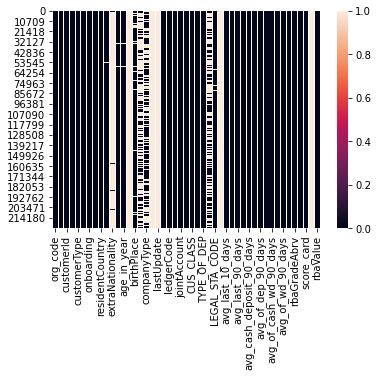

In [11]:
#Check for Overall Missing Values
if df.isnull().values.any()==True:
    print("There are missing values, and to visualize:")
    sns.heatmap(df.isnull())

## 1.4 **First Data Explore on the MetaData**

We utilize **googletrans**, a free and unlimited python library that implemented Google Translate API, to help us translate the Arabic descriptions into English.

In [12]:
df2_Prof = pd.read_excel('RBA Metadata.xlsx', sheet_name = "Profession")
df2_Prof = df2_Prof.iloc[range(42),:]
print(df2_Prof.head())
print(len(df2_Prof['Value'].unique()))
df2_Prof['Value']=pd.to_numeric(df2_Prof['Value'])
print(df2_Prof.shape[0])
df2_Prof.info()

            Code Value           Description
0  RBA_PROF_High    12       رئيس مجلس ادارة
1  RBA_PROF_High    13  نائب رئيس مجلس ادارة
2  RBA_PROF_High    14        عضو مجلس ادارة
3  RBA_PROF_High    15              مدير عام
4  RBA_PROF_High    16         نائب مدير عام
42
42
<class 'pandas.core.frame.DataFrame'>
Int64Index: 42 entries, 0 to 41
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         42 non-null     object
 1   Value        42 non-null     int64 
 2   Description  42 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [13]:
df2_Ledg = pd.read_excel('RBA Metadata.xlsx',dtype={'value': int},sheet_name = "Ledgers")
print(df2_Ledg.head())
print(len(df2_Ledg['value'].unique()))
print(df2_Ledg.shape[0])
df2_Ledg['value']=pd.to_numeric(df2_Ledg['value'])
df2_Ledg.info()

              code  value                                  dsc
0  RBA_Ledger_High   1041  ارصده لدى بنوك خارج المملكه / اشعار
1  RBA_Ledger_High   1050      شيكات برسم القبض (اوراق مشتراه)
2  RBA_Ledger_High   1120                  استثمارات فى الاسهم
3  RBA_Ledger_High   1121           إستثمارات في الأسهم/خارجية
4  RBA_Ledger_High   1122  استثمارات في الاسهم لاغراض المتاجره
402
402
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 402 entries, 0 to 401
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    402 non-null    object
 1   value   402 non-null    int32 
 2   dsc     401 non-null    object
dtypes: int32(1), object(2)
memory usage: 8.0+ KB


In [14]:
df2_Cust = pd.read_excel('RBA Metadata.xlsx',dtype={'value': int},sheet_name = "Cus_Class")
print(df2_Cust.head())
print(len(df2_Cust['value'].unique()))
print(df2_Cust.shape[0])
df2_Cust['value']=pd.to_numeric(df2_Cust['value'])
df2_Cust.info()

             code  value               dsc
0  Customer_Class      0            لايوجد
1  Customer_Class      1          جواز سفر
2  Customer_Class     15              اخرى
3  Customer_Class      2  هوية احوال مدنية
4  Customer_Class      3        دفتر عائلة
26
26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    26 non-null     object
 1   value   26 non-null     int32 
 2   dsc     26 non-null     object
dtypes: int32(1), object(2)
memory usage: 648.0+ bytes


In [15]:
df2_ECOSEC = pd.read_excel('RBA Metadata.xlsx',dtype={'value': int},sheet_name = "ECO_SEC")
print(df2_ECOSEC.head())
print(len(df2_ECOSEC['value'].unique()))
print(df2_ECOSEC.shape[0])
print(sum(df2_ECOSEC.duplicated(['value'])))
df2_ECOSEC['value']=pd.to_numeric(df2_ECOSEC['value'])
df2_ECOSEC.info()

               code  value                                   dsc
0  RBA_ECO_SEC_High    124  استخراج البترول الخام والغاز الطبيعي
1  RBA_ECO_SEC_High    148          صناعة مشتقات البترول المكررة
2  RBA_ECO_SEC_High    150      صناعة الاسمدة ومركبات النيتروجين
3  RBA_ECO_SEC_High    197                       صناعة المجوهرات
4  RBA_ECO_SEC_High    219                          بيع السيارات
377
383
6
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    383 non-null    object
 1   value   383 non-null    int32 
 2   dsc     382 non-null    object
dtypes: int32(1), object(2)
memory usage: 7.6+ KB


#### Caution, there are 6 duplicated values with different associated risk category. Decision to remove

In [16]:
df2_ECOSEC = df2_ECOSEC.drop_duplicates(['value'], keep=False)
df2_ECOSEC


,code,value,dsc
0,RBA_ECO_SEC_High,124,استخراج البترول الخام والغاز الطبيعي
1,RBA_ECO_SEC_High,148,صناعة مشتقات البترول المكررة
2,RBA_ECO_SEC_High,150,صناعة الاسمدة ومركبات النيتروجين
3,RBA_ECO_SEC_High,197,صناعة المجوهرات
4,RBA_ECO_SEC_High,219,بيع السيارات
...,...,...,...
376,RBA_ECO_SEC_Med,23,"الصناعات البترولية,الكيماويةوالبلاستكية"
377,RBA_ECO_SEC_Med,236,بيع محروقات السيارات
380,RBA_ECO_SEC_Med,38,التبغ والسجائر
381,RBA_ECO_SEC_Med,41,تجارة التبغ والمشروبات الروحية


In [17]:
df2_TYPDEP = pd.read_excel('RBA Metadata.xlsx',dtype={'value': int},sheet_name = "Type_Of_DEP")
print(df2_TYPDEP.head())
print(len(df2_TYPDEP['value'].unique()))
print(df2_TYPDEP.shape[0])
df2_TYPDEP['value']=pd.to_numeric(df2_TYPDEP['value'])
df2_TYPDEP.info()

            code  value                 dsc
0  RBA_TDEP_High    100       ائتلاف  شركات
1  RBA_TDEP_High     12               احزاب
2  RBA_TDEP_High     13              نقابات
3  RBA_TDEP_High     44       وحدة الأوفشور
4  RBA_TDEP_High     62  شركة استثمار مشترك
63
63
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    63 non-null     object
 1   value   63 non-null     int32 
 2   dsc     62 non-null     object
dtypes: int32(1), object(2)
memory usage: 1.4+ KB


In [18]:
df2_LEGSTCOD = pd.read_excel('RBA Metadata.xlsx',dtype={'value': int},sheet_name = "Legal_STA_Code")
print(df2_LEGSTCOD.head())
print(len(df2_LEGSTCOD['value'].unique()))
print(df2_LEGSTCOD.shape[0])
df2_LEGSTCOD['value']=pd.to_numeric(df2_LEGSTCOD['value'])
df2_LEGSTCOD.info()

                 code  value                          dsc
0  RBA_H_legal_Entity    100                ائتلاف  شركات
1  RBA_H_legal_Entity     12                        احزاب
2  RBA_H_legal_Entity     13                       نقابات
3  RBA_H_legal_Entity      2  مؤسسات حكوميه خارج الموازنه
4  RBA_H_legal_Entity     27                       متقاعد
62
62
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   code    62 non-null     object
 1   value   62 non-null     int32 
 2   dsc     62 non-null     object
dtypes: int32(1), object(2)
memory usage: 1.3+ KB


In [19]:
df2_Countries = pd.read_excel('RBA Metadata.xlsx',dtype=str,sheet_name = "COUNTRIES")
print(df2_Countries.head())
print(len(df2_Countries['value'].unique()))
print(df2_Countries.shape[0])

                 code value                   dsc
0  RBA_Countries_High    AD                ANDORA
1  RBA_Countries_High    AF           AFGHANISTAN
2  RBA_Countries_High    AG   ANTIGUA AND BARBUDA
3  RBA_Countries_High    AN  NETHERLANDS ANTILLES
4  RBA_Countries_High    AO                ANGOLA
231
231


In [20]:
df2_Currencies = pd.read_excel('RBA Metadata.xlsx',dtype=str,sheet_name = "Currencies")
print(df2_Currencies.head())
print(len(df2_Currencies['value'].unique()))
print(df2_Currencies.shape[0])
print(sum(df2_Currencies.duplicated(['value'])))

                code value             dsc
0  RBA_Currency_High   COP          Copper
1  RBA_Currency_High   IQD     Iraqi Dinar
2  RBA_Currency_High   IRR    Iranian Rial
3  RBA_Currency_High   LBP   Lebanese Lira
4  RBA_Currency_High   PKR  Pakistan Rupee
58
59
1


#### Caution, there is 1 duplicated value (COP) with different associated risk category. Decision to remove

In [21]:
df2_Currencies = df2_Currencies.drop_duplicates(['value'], keep=False)
df2_Currencies.head()

,code,value,dsc
1,RBA_Currency_High,IQD,Iraqi Dinar
2,RBA_Currency_High,IRR,Iranian Rial
3,RBA_Currency_High,LBP,Lebanese Lira
4,RBA_Currency_High,PKR,Pakistan Rupee
5,RBA_Currency_High,QAR,Qatari Rial


**We use the Google translation package to translate the Arabic columns into English**

In [22]:
df2_Prof['Description'].apply(translator.translate, src='ar', dest='en').apply(getattr, args=('text',))

0                                     chairman
1      Vice Chairman of the Board of Directors
2             Member of the Board of Directors
3                             Director general
4                       Deputy General Manager
5                                       Banker
6                                   Accountant
7                                     minister
8                                        Judge
9                                   Ambassador
10                                      Deputy
11                                         Eye
12                                        dean
13                               major General
14                                   President
15                                   President
16                            Senior political
17             Government is a foreign country
18              A foreign political exhibition
19    A military person with a foreign country
20                                  contractor
21           

***

<img src="h2.png" width=1000 height=100 align="center">

In Section 2, based on the columns we have explored, we are carrying out data cleaning based on data rules and business rules. To conceptualize the process, we consider **vertically** by columns to decide which columns to keep based on quality and values <i>(such as NAN,????,0)</i>, and **horizontally** by rows to apply business rules to identify unvalid trasaction logs.

**Rules are highlighted throughout the entire data cleaning process to signify a data transformation step that is taken as a result of previous analysis.**

<img src="cleaning.png" width=500 height=100 align="center">

## 2.1 Identify and handle missing, inconsistent and incorrect values

### 2.1.1 Identify missing values using isnull() to identify NA, np.nan, NULL  

In [23]:
def check_missing(df):
    #to check the column's missing value and its percentage
    miss_pres=round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
    miss_pres_val=round(df.isnull().sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres]
    return miss_pres_val

In [24]:
miss_pres_val=check_missing(df)
miss_pres_val

score_card_Desc        100.00
lastUpdate             100.00
legal_Stat_desc        100.00
birthCountry           100.00
giinCode                99.99
extraNationality        99.20
profession              64.54
GENDER                  53.59
companyType             49.05
birthPlace               9.71
dateOfBirth              2.10
age_in_year              2.10
nationalityOriginal      1.53
LEGAL_STA_CODE           1.16
residentCountry          0.27
dtype: float64

In [25]:
df[df["extraNationality"].notnull()]['extraNationality'].count()

1793

## Rule 1. Threshold for Missing Values:
We decide on **99.50%** as the threshold for missing values, based on 1793 rows of valid <i>"extraNationality"</i> values.

We decide to delete features who have missing values **>99.5%**, including:
<ul>
<li>score_card_Desc        100.00</li>
<li>lastUpdate             100.00</li>
<li>legal_Stat_desc        100.00</li>
<li>birthCountry           100.00</li>
<li>giinCode                99.99</li>
</ul>

In [26]:
#threshold=float(input('threshold of min inclusive % missing values in column to remove whole column: '))

In [27]:
for x in miss_pres_val.index:
    if float(miss_pres_val[x])>=99.5:
        x
        df=df.drop(columns=[x])

In [28]:
miss_pres_val=check_missing(df)
miss_pres_val

extraNationality       99.20
profession             64.54
GENDER                 53.59
companyType            49.05
birthPlace              9.71
dateOfBirth             2.10
age_in_year             2.10
nationalityOriginal     1.53
LEGAL_STA_CODE          1.16
residentCountry         0.27
dtype: float64

For **extraNationality**, we want to keep those information on extra nationality, therefore transforming the column into a binary variable, with those who have extra nationality as 1.

In [29]:
df['extraNationality']=df['extraNationality'].fillna(0)
df['extraNationality']=df['extraNationality'].apply(lambda x: 1 if x != 0 else x)
df['extraNationality'].value_counts()

0    223075
1      1793
Name: extraNationality, dtype: int64

For the lower threshold below **2.5%**, we decide to **remove** all the rows that have the NAN, including:
<ul>
<li>dateOfBirth              2.10</li>
<li>age_in_year              2.10</li>
<li>nationalityOriginal      1.53</li>
<li>LEGAL_STA_CODE           1.16</li>
<li>residentCountry          0.27</li>
</ul>

In [30]:
for a in ('dateOfBirth',"age_in_year",'LEGAL_STA_CODE','residentCountry','nationalityOriginal'):
    list((df[a].isnull()).index)
    df.drop(labels=list(df.index[df[a].isnull()]),axis=0, inplace=True)

In [31]:
#We check at this step that output is as desired.
check_missing(df)

profession     63.48
GENDER         52.40
companyType    49.35
birthPlace      7.90
dtype: float64

In [32]:
df.shape

(214486, 42)

### 2.1.2 Identify other hidden missing values
After 2.1.1 applying isnull(), we discover that the data quality of each column needs to be check against each business meaning.

Based on business interpretation, a dictionary called basic_info is defined to:
<ul>
<li>asign the desired dtype for each column</li>
<li>detect the cells with no information, based on not having any relevant character for that field.<br>I.e. an account number should have at least a number 0-9, a city name should have at least a letter a-Z or A-Z.</li>
</ul>

    


In [33]:
basic_info    = {'org_code':                   ['str','([0-9\s]+)'], 
                 'branchCode':                 ['str','([0-9\s]+)'], 
                 'customerId':                 ['str','([0-9\s]+)'], 
                 'fullaccount':                ['str','([0-9\s]+)'],
                 'customerType':               ['int','([0-9\s]+)'],
                 'creationDate':               ['datetime','([0-9\s]+)'],
                 'onboarding':                 ['str','([a-zA-Z\s]+)'],
                 'residentStatus':             ['int','([0-9\s]+)'],
                 'residentCountry':            ['str','([a-zA-Z\s]+)'],
                 'nationalityOriginal':        ['str','([a-zA-Z\s]+)'],
                 'extraNationality':           ['int', '([0-9\s]+)'],
                 'dateOfBirth':                ['datetime', '([0-9\s]+)'],
                 'age_in_year':                ['int', '([0-9\s]+)'],
#                 'birthCountry':               ['str', '([a-zA-Z\s]+)'],
                 'birthPlace':                 ['str', '([a-zA-Z\s]+)'],
                 'profession':                 ['int', '([0-9\s]+)'],
                 'companyType':                ['int', '([0-9\s]+)'],
#                 'giinCode':                   ['str', '([a-zA-Z0-9\s]+)'],
#                 'lastUpdate':                 ['str', '([0-9\s]+)'],
                 'status':                     ['str', '([a-zA-Z\s]+)'],
                 'ledgerCode':                 ['int', '([0-9\s]+)'],
                 'accountCurrency':            ['str', '([a-zA-Z\s]+)'],
                 'jointAccount':               ['int', '([0-9\s]+)'],
                 'IsBlackListed':              ['int', '([0-9\s]+)'],
                 'CUS_CLASS':                  ['int', '([0-9\s]+)'],
                 'ECO_SEC':                    ['int', '([0-9\s]+)'],
                 'TYPE_OF_DEP':                ['int', '([0-9\s]+)'],
                 'GENDER':                     ['int','([0-9\s]+)'],
                 'LEGAL_STA_CODE':             ['int', '([0-9\s]+)'],
#                 'legal_Stat_desc':            ['str', '([a-zA-Z\s]+)'],
                 'avg_last_10_days':           ['float','([0-9\s]+)'],
                 'avg_last_30_days':           ['float','([0-9\s]+)'],
                 'avg_last_90_days':           ['float', '([0-9\s]+)'],
                 'number_of_cash_dep_90_days': ['int','([0-9\s]+)'],
                 'avg_cash_deposit_90_days':   ['int', '([0-9\s]+)'],
                 'number_of_deposit_90_days':  ['int','([0-9\s]+)'],
                 'avg_of_dep_90_days':         ['float', '([0-9\s]+)'],
                 'number_of_cash_wd_90_days':  ['int','([0-9\s]+)'],
                 'avg_of_cash_wd_90_days':     ['float', '([0-9\s]+)'],
                 'number_of_wd_90_days':       ['int', '([0-9\s]+)'],
                 'avg_of_wd_90_days':          ['float','([0-9\s]+)'],
                 'date_of_assessment':         ['datetime','([0-9\s]+)'],
                 'rbaGradeAbrv':               ['str', '([a-zA-Z\s]+)'],
                 'rba_grade_desc':             ['str', '([a-zA-Z\s]+)'],
                 'score_card':                 ['str','([a-zA-Z\s]+)'],
#                 'score_card_Desc':            ['str', '([a-zA-Z\s]+)'],
                 'rbaValue':                   ['float','([0-9\s]+)']}

In [34]:
MaskA=df.isnull() # Mask A for na values detected with isna()
MaskB=pd.DataFrame(False,index=df.index, columns=df.columns) # Mask B for unveiling cells with no info

for y in range(df.shape[1]):
    binf=basic_info.get(df.columns[y])[1]
    masknull=pd.Series("",index=df.index)
    bb = (df.iloc[:,y].astype(str)).str.extract(binf,expand=False).str.strip()
    maskbb=(bb==masknull)
    MaskB.iloc[:,y] = maskbb|bb.isna()

MaskB[MaskA]=False


miss_pres_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_A]
print("--"*15)
print("Type 1. % Missing values NaN")
print("--"*15)
if len(miss_pres_val_A)==0:
    print("\033[1m"+"There is no more column contains missing data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_A)
    print("")

miss_pres_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_B]
print("--"*20)
print("Type 2. % Missing info, no number/letter")
print("--"*20)
if len(miss_pres_val_B)==0:
    print("\033[1m"+"There is no more column contains irregular format of data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_B)
    print("")

------------------------------
Type 1. % Missing values NaN
------------------------------
profession     63.48
GENDER         52.40
companyType    49.35
birthPlace      7.90
dtype: float64

----------------------------------------
Type 2. % Missing info, no number/letter
----------------------------------------
birthPlace    91.48
dtype: float64



## Rule 2. Treat badly formated data, such as "???":
We discover that the column **birthPlace** includes "???" for most of cells, and 91.48% of the column does not contain appropriated form of data. We treat this bad data quality as NAN. 


In [35]:
df[MaskB]=np.nan

MaskA=df.isnull() # Mask A for na values detected with isna()
MaskB=pd.DataFrame(False,index=df.index, columns=df.columns) # Mask B for unveiling cells with no info

for y in range(df.shape[1]):
    binf=basic_info.get(df.columns[y])[1]
    bb = (df.iloc[:,y].astype(str)).str.extract(binf,expand=False).str.strip()
    MaskB.iloc[:,y] = bb.isna()

MaskB[MaskA]=False

miss_pres_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_A]
print("--"*15)
print("Type 1. % Missing values NaN")
print("--"*15)
if len(miss_pres_val_A)==0:
    print("\033[1m"+"There is no more column contains missing data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_A)
    print("")
    
miss_pres_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_B]
print("--"*20)
print("Type 2. % Missing info, no number/letter")
print("--"*20)
if len(miss_pres_val_B)==0:
    print("\033[1m"+"There is no more column contains irregular format of data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_B)
    print("")

------------------------------
Type 1. % Missing values NaN
------------------------------
birthPlace     99.39
profession     63.48
GENDER         52.40
companyType    49.35
dtype: float64

----------------------------------------
Type 2. % Missing info, no number/letter
----------------------------------------
There is no more column contains irregular format of data.



In [36]:
#To double-check the "birthPlace" column's values:
df['birthPlace'].value_counts()

BAGHDAD              66
JORDAN               38
LARKANA              37
BAGDAD               35
PUNJAB               26
                     ..
komari                1
JHAMKE KHURD TARN     1
ploiesti              1
INDONISIA             1
lasam cagayan         1
Name: birthPlace, Length: 489, dtype: int64

Since "birthPlace" is only a descriptive feature, not associated directly to decide the RBA rating; "nationalityOriginal" includes information that reflects "birthPlace", **we decide to drop the "birthPlace" column**.

In [37]:
df=df.drop(columns=['birthPlace'])

In [38]:
df.shape

(214486, 41)

### 2.1.3 Dtype Inconsistencies 

Detect cells that cannot be casted into desired dtype:
Those that directly cannot be cast, try to extract only relevant characters and try to cast again:
<ul>
<li>If they cannot be casted still, assume those are incorrectly input values and set as missing as well NaN</li>
<li>If after removing can be casted, then transform cell by extracting only relevant characters for later casting
(For this purpose we are using the dictionary created earlier for desired dtypes, in basic_info)</li>
</ul>

In [39]:
MaskA=df.isnull() # Mask A for na values detected with isna()
MaskB=pd.DataFrame(False,index=df.index, columns=df.columns) # Mask B for unveiling cells with no info
MaskC=pd.DataFrame(False,index=df.index, columns=df.columns) # Mask C for detecting inconsistent cells with desired dtype

#Check before transformation:
#Tries to cast all dtype for each cell, and returns a NaN whenever it finds an error casting it

for y in range(df.shape[1]):
    binftype=basic_info.get(df.columns[y])[0]
    if binftype == 'int':
        col_num=pd.to_numeric(df.iloc[:,y],errors='coerce', downcast='integer')
        MaskC.iloc[:,y] = col_num.isna()
    elif binftype == 'float':
        col_num=pd.to_numeric(df.iloc[:,y],errors='coerce')
        MaskC.iloc[:,y] = col_num.isna()
    elif binftype == 'datetime':
        col_num=pd.to_datetime(df.iloc[:,y],errors='coerce')
        MaskC.iloc[:,y] = col_num.isna()

MaskC[MaskA]=False

miss_pres_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_A]
print("--"*15)
print("Type 1. % Missing values NaN")
print("--"*15)
if len(miss_pres_val_A)==0:
    print("\033[1m"+"There is no more column contains missing data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_A)
    print("")

miss_pres_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_B]
print("--"*20)
print("Type 2. % Missing info, no number/letter")
print("--"*20)
if len(miss_pres_val_B)==0:
    print("\033[1m"+"There is no more column contains irregular format of data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_B)
    print("")

miss_pres_C=round(MaskC.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_C=round(MaskC.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_C]
print("--"*16)
print("Type 3. % Inconsistent datatype")
print("--"*16)
if len(miss_pres_val_C)==0:
    print("\033[1m"+"There is no more column contains inconsistent types of data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_C)
    print("")


------------------------------
Type 1. % Missing values NaN
------------------------------
profession     63.48
GENDER         52.40
companyType    49.35
dtype: float64

----------------------------------------
Type 2. % Missing info, no number/letter
----------------------------------------
There is no more column contains irregular format of data.

--------------------------------
Type 3. % Inconsistent datatype
--------------------------------
There is no more column contains inconsistent types of data.



## Rule 3: Transforming all datatypes to required/desired ones

Checked above that data can be casted into desired/required types, and therefore the change is done to the dataframe accordingly.

In [40]:
for y in range(df.shape[1]):
    binftype=basic_info.get(df.columns[y])[0]
    if binftype == 'int':
        df.iloc[:,y]=pd.to_numeric(df.iloc[:,y],errors='coerce', downcast='integer')
        MaskC.iloc[:,y] = df.iloc[:,y].isna()
    elif binftype == 'float':
        df.iloc[:,y]=pd.to_numeric(df.iloc[:,y],errors='coerce')
        MaskC.iloc[:,y] = df.iloc[:,y].isna()
    elif binftype == 'datetime':
        df.iloc[:,y]=pd.to_datetime(df.iloc[:,y],errors='coerce')
        MaskC.iloc[:,y] = df.iloc[:,y].isna()

MaskC[MaskA]=False

### 2.1.4 Business Rules and Inconsistencies
In this step we ensure that business rules are applied to treat missing/error data values and make decisions to keep or remove certain variables based on data quality and available data sources. In additions, the selected variables are treated with appropriate data type and format based on the bussiness rules.

**If the amount of data that are not in compliance with a specific business role is less than 5%, we remove them.**


## Rule 4:  Grouping variables to reduce the dimension
For all 41 variables we have so far, we group variables into four categories according to describe the business activities. 

It safeguard the flows of data cleaning based on business flows with an objective to aggregate the rows to describe each unique accountId.

In [41]:
group_variables = {
                    #internally identify an account
                    "accountInfo":['org_code', 'branchCode', 'customerId', 'fullaccount', 'customerType',
                                   'creationDate', 'onboarding','status','accountCurrency','jointAccount', 
                                   'IsBlackListed'],
                   #to describe "Who" is this account
                    "demographic":['residentStatus', 'residentCountry','nationalityOriginal', 'extraNationality',
                                   'dateOfBirth', 'age_in_year','profession','companyType','ledgerCode',
                                   'CUS_CLASS', 'ECO_SEC', 'TYPE_OF_DEP','GENDER', 'LEGAL_STA_CODE'],
                    #information on the account activities
                    "Transaction":['avg_last_10_days', 'avg_last_30_days',
                                   'avg_last_90_days', 'number_of_cash_dep_90_days',
                                   'avg_cash_deposit_90_days', 'number_of_deposit_90_days',
                                   'avg_of_dep_90_days', 'number_of_cash_wd_90_days',
                                   'avg_of_cash_wd_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days'],
                    #information on RBA Rating
                     "RBA_rating":['date_of_assessment', 'rbaGradeAbrv', 'rba_grade_desc', 'score_card',
                                    'rbaValue']}

In [42]:
print(sum([len(group_variables[x]) for x in group_variables if isinstance(group_variables[x], list)]))

41


In [43]:
df[group_variables['Transaction']]

,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_cash_dep_90_days,avg_cash_deposit_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_cash_wd_90_days,avg_of_cash_wd_90_days,number_of_wd_90_days,avg_of_wd_90_days
1,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0
2,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,0.0,0,0.0
3,2079.79,526.87,6.68,4,-550.0,4,-550.0,1,50.0,1,50.0
4,444.00,120.50,0.95,4,-540.0,4,-540.0,1,56.0,1,56.0
5,0.00,0.00,0.00,0,0.0,0,0.0,0,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
224863,82249.30,20728.80,222.94,0,0.0,0,0.0,0,0.0,0,0.0
224864,111388.80,28073.60,301.87,0,0.0,0,0.0,0,0.0,0,0.0
224865,6597.29,1662.73,17.88,0,0.0,0,0.0,0,0.0,0,0.0
224866,-110.01,-18.34,0.00,0,0.0,0,0.0,0,0.0,0,0.0


In [44]:
print("Based on comparision between those columns for cash and overall activities:")
print("Deposit(#):"+ str(round(sum(df["number_of_cash_dep_90_days"]==df["number_of_deposit_90_days"])/df.shape[0],2)))
print("Deposit(avg):"+ str(round(sum(df["avg_cash_deposit_90_days"]==df["avg_of_dep_90_days"])/df.shape[0],2)))
print("Withdraw(#):"+ str(round(sum(df["number_of_cash_wd_90_days"]==df["number_of_wd_90_days"])/df.shape[0],2)))
print("Withdraw(avg):"+ str(round(sum(df["avg_of_cash_wd_90_days"]==df["avg_of_wd_90_days"])/df.shape[0],2)))

df[df["number_of_cash_dep_90_days"]!=df["number_of_deposit_90_days"]][["number_of_cash_dep_90_days","number_of_deposit_90_days"]]

Based on comparision between those columns for cash and overall activities:
Deposit(#):0.95
Deposit(avg):0.95
Withdraw(#):0.98
Withdraw(avg):0.98


,number_of_cash_dep_90_days,number_of_deposit_90_days
56,1,4
78,3,5
111,1,4
129,3,4
148,5,6
...,...,...
224779,0,3
224810,31,70
224840,4,14
224845,0,1


In [45]:
print("For those columns (less than 5%) that do not have the same values for cash and overall activities, we decide to choose overall info to represent the specific dep/wd activities. ")
df=df.drop(columns=["number_of_cash_dep_90_days",'avg_cash_deposit_90_days'
                    ,'number_of_cash_wd_90_days','avg_of_cash_wd_90_days'])

For those columns (less than 5%) that do not have the same values for cash and overall activities, we decide to choose overall info to represent the specific dep/wd activities. 


In [46]:
df.shape

(214486, 37)

## Rule 5:  an account number has 18 digits 
A dictionary of business rules is created (bus_rules_ind) to detect data that do not compliant with the business rules, considering: 
<ul>
<li>number of characters </li>
<li>exclusive type of characters </li>
</ul>

In [47]:
bus_rules_ind = {'org_code':            [3,'([0-9\s]+)'],
                'branchCode':           [3,'([0-9\s]+)'],
                'customerId':           [18, '([0-9\s]+)'],
                'fullaccount':          [21, '([0-9\s]+)'],
                'customerType':         [1, '([1-2\s]+)'],
 #               'birthPlace':           [0,'([a-zA-Z\s]+)'],
                'residentStatus':       [1, '([1-2\s]+)'],
                'residentCountry':      [2, '([A-Z\s]+)'],
                'nationalityOriginal':  [2, '([A-Z\s]+)'],
                'extraNationality':     [1, '([0-9\s]+)'],
                'accountCurrency':      [3, '([A-Z\s]+)'],
                'jointAccount':         [1, '([0-1\s]+)']}

In [48]:
MaskD=pd.DataFrame(False,index=df.index, columns=df.columns)

for key in bus_rules_ind:

    MaskDdummy=pd.Series(True,index=df.index)
    za=((df[key]).astype(str))
    zb=za.str.extract(bus_rules_ind.get(key)[1],expand=False).str.strip()
    zextr_len=zb.str.len()
    z_len=(df[key].astype(str)).str.len()
    if bus_rules_ind.get(key)[0] == 0:
        a = ((zextr_len > 0) & (z_len > 0))
        MaskDdummy[a] = False
        MaskD[key]=MaskDdummy
    else:   
        a = ((bus_rules_ind.get(key)[0] == zextr_len) & (bus_rules_ind.get(key)[0] == z_len))
        MaskDdummy[a] = False
        MaskD[key]=MaskDdummy
          
MaskD[MaskA]=False

miss_pres_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_A]
print("--"*15)
print("Type 1. % Missing values NaN")
print("--"*15)
if len(miss_pres_val_A)==0:
    print("\033[1m"+"There is no more column contains missing data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_A)
    print("")

miss_pres_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_B]
print("--"*20)
print("Type 2. % Missing info, no number/letter")
print("--"*20)
if len(miss_pres_val_B)==0:
    print("\033[1m"+"There is no more column contains irregular format of data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_B)
    print("")

miss_pres_C=round(MaskC.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_C=round(MaskC.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_C]
print("--"*16)
print("Type 3. % Inconsistent datatype")
print("--"*16)
if len(miss_pres_val_C)==0:
    print("\033[1m"+"There is no more column contains inconsistent types of data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_C)
    print("")

miss_pres_D=round(MaskD.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_D=round(MaskD.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_D]
print("--"*27)
print("Type 4. % Incompliance with individual business rules")
print("--"*27)
if len(miss_pres_val_D)==0:
    print("\033[1m"+"All columns are compliant with the business rules for data types."+'\033[0m')
else:
    print(miss_pres_val_D)
    print("")

------------------------------
Type 1. % Missing values NaN
------------------------------
profession     63.48
GENDER         52.40
companyType    49.35
dtype: float64

----------------------------------------
Type 2. % Missing info, no number/letter
----------------------------------------
There is no more column contains irregular format of data.

--------------------------------
Type 3. % Inconsistent datatype
--------------------------------
There is no more column contains inconsistent types of data.

------------------------------------------------------
Type 4. % Incompliance with individual business rules
------------------------------------------------------
customerId    2.24
dtype: float64



In [49]:
df['customerId'][MaskD['customerId']].value_counts()
print("There are "+ str(len(df['customerId'][MaskD['customerId']])) + " columns that have an customerId that is not 18 digits.")

There are 4795 columns that have an customerId that is not 18 digits.


In [50]:
if 100*len(df['customerId'][MaskD['customerId']])/len(df['customerId'])<5:
    print("The error data is "+ str(100*len(df['customerId'][MaskD['customerId']])/len(df['customerId']))+ "%, less than the 5% threshold.")

The error data is 2.2355771472263926%, less than the 5% threshold.


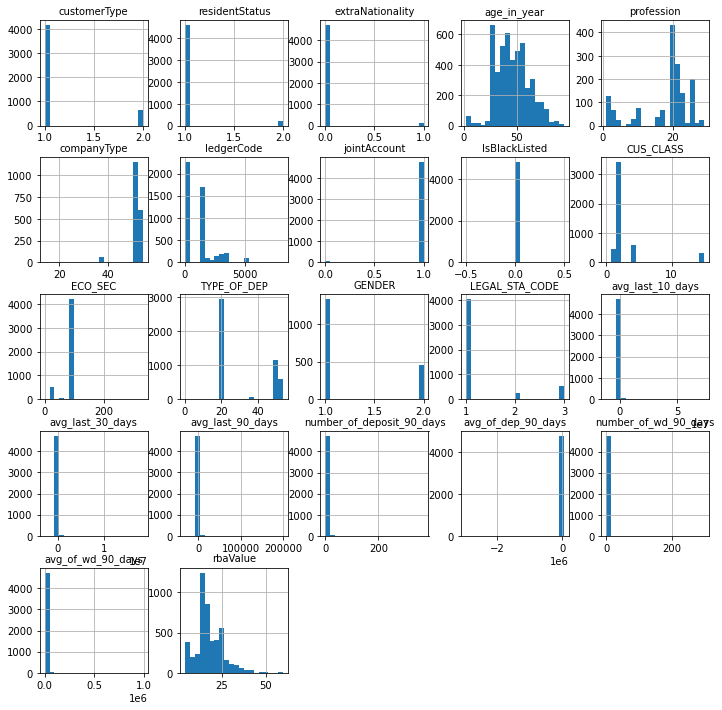

In [51]:
import matplotlib.pylab as plt
eleven_d=df[MaskD['customerId']]
attribute_columns = list(eleven_d.columns)
if True:
    fontsize = 10
    fig = eleven_d[attribute_columns].hist(bins = 20, figsize = (12, 12),
                                       xlabelsize=fontsize,
                                       ylabelsize=fontsize)
    for x in fig.ravel():
        x.title.set_size(fontsize)
else:
    nrows = (len(attribute_columns)+1) // 2
    plt.figure(figsize=(12,25))
    for i in range(len(attribute_columns)):
        name = attribute_columns[i]
        plt.subplot(nrows,2,i+1)
        data[name].hist()
        plt.title(name, fontsize=14)
    
plt.show()

### Remove 11-digit account with inactivity. 
<ul>
<li>1)It is 2.24% of the dataset, less than the 5% threshold.</li>
<li>2)From the histogram, we identify zero values for transactional information for almost all the 11-digit accounts.</li>
</ul>
    
    

In [52]:
df.shape

(214486, 37)

In [53]:
df.drop(list(df[MaskD['customerId']].index),axis=0, inplace=True)

In [54]:
df.shape

(209691, 37)

In [55]:
MaskD=pd.DataFrame(False,index=df.index, columns=df.columns)

for key in bus_rules_ind:

    MaskDdummy=pd.Series(True,index=df.index)
    za=((df[key]).astype(str))
    zb=za.str.extract(bus_rules_ind.get(key)[1],expand=False).str.strip()
    zextr_len=zb.str.len()
    z_len=(df[key].astype(str)).str.len()
    if bus_rules_ind.get(key)[0] == 0:
        a = ((zextr_len > 0) & (z_len > 0))
        MaskDdummy[a] = False
        MaskD[key]=MaskDdummy
    else:   
        a = ((bus_rules_ind.get(key)[0] == zextr_len) & (bus_rules_ind.get(key)[0] == z_len))
        MaskDdummy[a] = False
        MaskD[key]=MaskDdummy
          
MaskD[MaskA]=False

miss_pres_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_A=round(MaskA.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_A]
print("--"*15)
print("Type 1. % Missing values NaN")
print("--"*15)
if len(miss_pres_val_A)==0:
    print("\033[1m"+"There is no more column contains missing data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_A)
    print("")

miss_pres_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_B=round(MaskB.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_B]
print("--"*20)
print("Type 2. % Missing info, no number/letter")
print("--"*20)
if len(miss_pres_val_B)==0:
    print("\033[1m"+"There is no more column contains irregular format of data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_B)
    print("")

miss_pres_C=round(MaskC.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_C=round(MaskC.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_C]
print("--"*16)
print("Type 3. % Inconsistent datatype")
print("--"*16)
if len(miss_pres_val_C)==0:
    print("\033[1m"+"There is no more column contains inconsistent types of data."+'\033[0m')
    print("")
else:
    print(miss_pres_val_C)
    print("")

miss_pres_D=round(MaskD.sum()/df.shape[0]*100,2).sort_values(ascending=False)>0
miss_pres_val_D=round(MaskD.sum()/df.shape[0]*100,2).sort_values(ascending=False)[miss_pres_D]
print("--"*27)
print("Type 4. % Incompliance with individual business rules")
print("--"*27)
if len(miss_pres_val_D)==0:
    print("\033[1m"+"All columns are compliant with individual business rules."+'\033[0m')
else:
    print(miss_pres_val_D)
    print("")

------------------------------
Type 1. % Missing values NaN
------------------------------
profession     64.93
GENDER         53.60
companyType    50.47
dtype: float64

----------------------------------------
Type 2. % Missing info, no number/letter
----------------------------------------
There is no more column contains irregular format of data.

--------------------------------
Type 3. % Inconsistent datatype
--------------------------------
There is no more column contains inconsistent types of data.

------------------------------------------------------
Type 4. % Incompliance with individual business rules
------------------------------------------------------
All columns are compliant with individual business rules.


## Rule 6: An account cannot be created before the customer's birth

A business error occurs if an account is created before the customer (individual or entity)'s birth.
Remove the rows in error.

In [56]:
error1=df['creationDate']<df['dateOfBirth']
print("This business error applies to "+ str(sum(df['creationDate']<df['dateOfBirth']))+ " rows, suggesting to delete these rows.")

This business error applies to 2702 rows, suggesting to delete these rows.


In [57]:
df.shape

(209691, 37)

In [58]:
df.drop(list(df.index[error1]),axis=0, inplace=True)

In [59]:
df.shape

(206989, 37)

In [60]:
if sum(df['creationDate']<df['dateOfBirth'])==0:
    print("\033[1m"+"The rows with ERROR 1 has successfully removed, and the dataframe now has "+ str(df.shape[0])+ " rows."+'\033[0m')
else:
    print("\033[1m"+"The ERROR 1 still applies to "+ str(sum(df['creationDate']<df['dateOfBirth']))+ " rows, suggesting to delete these rows."+'\033[0m')

The rows with ERROR 1 has successfully removed, and the dataframe now has 206989 rows.


## Rule 7: An individual cannot have a company type and an entity cannot have a gender
 
<ul>
<li>For each individual ("customerType"=1), there is a consistently same Gender/Profession, a N/A company type, a non-null birthOfDate</li>
<li>For each entity ("customerType"=2), there is a N/A Gender/Profession, non-Null company type. </li>
</ul>

**Action**: Modify customer type based on valid demographic profiles 
<ul>
<li>If ENTITY who has a GENDER/PROFESSION,a N/A company type, a Non-null birthOfDate:</li> 
<b>Treat an Entity as "Individual"</b>


<li>If INDIVIDUAL who has a N/A GENDER/PROFESSION, a Non-null company type: </li> 
<b>Treat it as an ENTITY </b>



<li>If ENTITY or Individual who has a NULL in all relevant demographic descriptive variables </li> 
<b>Remove </b>




In [61]:
# Number of inconsistencies of scorecard with individual/entity
num_incon=(df['customerType']==2)&(df['score_card']=='I-Existing')|(df['customerType']==1)&(df['score_card']=='E-Existing')
sum(num_incon)

34

In [62]:
# Creating a Mask to select all except for 34 incorrectly assigned
aFINAL=(df['customerType']==1)&(df['score_card']=='I-Existing')|(df['customerType']==1)&(df['score_card']=='I-New')|(df['customerType']==2)&(df['score_card']=='E-Existing')|(df['customerType']==2)&(df['score_card']=='E-NEW')
aFINAL

1         True
2         True
3         True
4         True
5         True
          ... 
224862    True
224863    True
224865    True
224866    True
224867    True
Length: 206989, dtype: bool

In [63]:
# Applying the mask to df to get cleaned df
df=df[aFINAL]
df

,org_code,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,dateOfBirth,age_in_year,profession,companyType,status,ledgerCode,accountCurrency,jointAccount,IsBlackListed,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_wd_90_days,avg_of_wd_90_days,date_of_assessment,rbaGradeAbrv,rba_grade_desc,score_card,rbaValue
1,001,202,020200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,0,1989-06-30,30,27.0,NaN,Active,1330,JOD,0,0,2,90,23,2.0,1,0.00,0.00,0.00,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,16.93
2,001,202,020200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,0,1989-06-30,30,27.0,NaN,Active,1389,JOD,0,0,2,90,23,2.0,1,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,16.93
3,001,202,020200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,0,1989-06-30,30,27.0,NaN,Active,60,JOD,0,0,2,90,23,2.0,1,2079.79,526.87,6.68,4,-550.0,1,50.0,2019-01-24,L,Low,I-Existing,16.93
4,001,202,020200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,0,1989-06-30,30,27.0,NaN,Active,10,JOD,0,0,2,90,23,2.0,1,444.00,120.50,0.95,4,-540.0,1,56.0,2019-01-24,L,Low,I-Existing,16.93
5,001,202,020200207860000638,020200207860011355003,1,2013-09-17,N,1,JO,JO,0,1989-06-30,30,27.0,NaN,Active,1355,JOD,0,0,2,90,23,2.0,1,0.00,0.00,0.00,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,16.93
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
224862,001,502,050200388440002560,050200388440010010000,1,2015-02-26,N,1,JO,JO,0,1987-11-20,32,NaN,51.0,Active,10,JOD,0,0,15,90,51,2.0,1,73.00,22.80,0.10,0,0.0,0,0.0,2019-01-24,M,Medium,I-Existing,26.13
224863,001,404,040400811920003507,040400811920010020000,1,2017-10-22,N,1,JO,JO,0,1953-06-07,66,NaN,NaN,Active,20,JOD,0,0,2,90,20,1.0,1,82249.30,20728.80,222.94,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,16.53
224865,001,502,050220271300005255,050220271300012980002,1,2000-08-23,N,1,JO,JO,0,1978-06-01,41,NaN,51.0,Active,2980,JOD,0,0,2,90,51,NaN,1,6597.29,1662.73,17.88,0,0.0,0,0.0,2019-01-24,L,Low,I-Existing,14.53
224866,001,704,070424500690004664,070424500690011396000,1,2008-01-16,N,1,JO,JO,0,1949-01-01,70,NaN,NaN,Active,1396,JOD,0,0,2,90,20,2.0,1,-110.01,-18.34,0.00,0,0.0,0,0.0,2019-01-24,M,Medium,I-Existing,24.53


In [64]:
print("Before transformation: ")
print(df['customerType'].value_counts())
print('')

Before transformation: 
1    188313
2     18642
Name: customerType, dtype: int64



In [65]:
check_missing(df)

profession     62.91
GENDER         51.56
companyType    49.51
dtype: float64

In [66]:
i_e=df['score_card']=='I-Existing'  
i_n=df['score_card']=='I-New#'
e_e=df['score_card']=='E-Exi#sting'
e_n=df['score_card']=='E-NEW'

#Check if individual is assigned with Entity score_card
print("There are "+ str(df[e_e & df['customerType']==1].shape[0]+df[e_n & df['customerType']==1].shape[0])+" customerType 1 are treated as entity.")


#Check if entity is assigned with individual score_card
print("There are "+ str(df[i_e & df['customerType']==2].shape[0]+df[i_n & df['customerType']==2].shape[0])+" customerType 2 are treated as individual.")

There are 0 customerType 1 are treated as entity.
There are 0 customerType 2 are treated as individual.


In [67]:
#1. Identify INDIVIDUAL who has a N/A GENDER/PROFESSION, a Non-null company type
#Action: Treat the customer as ENTITY

false_indi=df["customerType"]==1 & df["GENDER"].isnull() & df["profession"].isnull() & df["companyType"].notnull() & df['TYPE_OF_DEP'].notnull()

if df[false_indi].shape[0]>0:
    print("There are "+str(df[false_indi].shape[0])+ " rows of data which have features as 'entity' but falsely identified as 'individual'.")
    df['customerType'] = np.where((false_indi), 2, df.customerType)
else:
    print("This business role does not apply.")   


There are 40606 rows of data which have features as 'entity' but falsely identified as 'individual'.


In [68]:
print("\033[1m"+"After assigning these "+ str(df[false_indi].shape[0])+ " rows to be ENTITY: "+'\033[0m')
print(df['customerType'].value_counts())

After assigning these 40606 rows to be ENTITY: 
1    147707
2     59248
Name: customerType, dtype: int64


In [69]:
#2. Identify ENTITY who has a GENDER/PROFESSION,a N/A company type, a Non-null birthOfDate 
#Action: Modify the customer type to individual
false_entity=df["customerType"]==2 & df["GENDER"].notnull() & df["profession"].notnull() & df["companyType"].isnull() & df["dateOfBirth"].notnull() & df['residentStatus'].notnull()

if df[false_entity].shape[0]>0:
    print("There are "+str(df[false_entity].shape[0])+ " rows of data which has features as 'individual' but falsely identified as 'entity'.")
    df['customerType'] = np.where((false_entity), 1, df.customerType)
else:
    print("This business rule does not apply.")

This business rule does not apply.


In [70]:
#3.Identify customers who has a NULL in all relevant demographic descriptive variables
#Action: Delete
invalid_customer=df["GENDER"].isnull() & df["profession"].isnull() & df["companyType"].isnull() & df["dateOfBirth"].isnull()


if df[invalid_customer].shape[0]>0:
    print("There are "+str(df[invalid_customer].shape[0])+ " rows of data do not have sufficient demographic features as neither an 'entity' nor 'individual'.")
    df.drop(list(df.index[invalid_customer]),axis=0, inplace=True)
else:
    print("This business rule does not apply.")  

This business rule does not apply.


In [71]:
#If there is still a null in profession column after applying the business rules, we treat NAN profession as 0.
if df['profession'].isnull().sum()!=0:
    df['profession']=df['profession'].fillna(0)
    print("Missing profession values are successfully filled with 0.")
else:
    print("There is no missing value in profession column.")

Missing profession values are successfully filled with 0.


### 2.1.5 Check for duplicated rows and drop homogenous columns

In [72]:
if df.duplicated().sum()==0:
    print("There is no duplicated row.")
else:
    print("There are "+ str(df.duplicated().sum())+ " duplicated rows. ")

There is no duplicated row.


In [73]:
infodf=pd.DataFrame(False, index=[1],columns=df.columns)
for x in df.columns:
    infodf[x]=len(df[x].unique())
infodf=infodf[infodf==1].T
hom=infodf[infodf[1]==1]

if len(hom)!=0:
    print("The following columns are homogenous: ")
    print(list(hom.index))
else:
    print("There is no column that has uniform values.")

The following columns are homogenous: 
['org_code', 'status', 'jointAccount', 'IsBlackListed', 'date_of_assessment']


In [74]:
list(hom.index)

['org_code', 'status', 'jointAccount', 'IsBlackListed', 'date_of_assessment']

In [75]:
#According to unique value rules, drop above columns that are homogenous.
df=df.drop(columns=['org_code', 'status', 'jointAccount', 'IsBlackListed', 'date_of_assessment'])
#According to business repetition, drop 'dateOfBirth' and keep 'age_in_year'
df=df.drop(columns=["dateOfBirth"])
df.shape

(206955, 31)

In [76]:
df.columns

Index(['branchCode', 'customerId', 'fullaccount', 'customerType',
       'creationDate', 'onboarding', 'residentStatus', 'residentCountry',
       'nationalityOriginal', 'extraNationality', 'age_in_year', 'profession',
       'companyType', 'ledgerCode', 'accountCurrency', 'CUS_CLASS', 'ECO_SEC',
       'TYPE_OF_DEP', 'GENDER', 'LEGAL_STA_CODE', 'avg_last_10_days',
       'avg_last_30_days', 'avg_last_90_days', 'number_of_deposit_90_days',
       'avg_of_dep_90_days', 'number_of_wd_90_days', 'avg_of_wd_90_days',
       'rbaGradeAbrv', 'rba_grade_desc', 'score_card', 'rbaValue'],
      dtype='object')

***

<img src="h3.png" width=1000 height=100 align="center">

In Section 3, we split the dataset into two dataframes according to customer type: individual and entity, and treat missing values and data of inconsistency after splitting.

In [77]:
# First we classify into M,L=0 and H=1 for "rbaGradeAbrv":
#df['rbaGradeAbrv'].value_counts()
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
#df['rbaGrade']=label_encoder.fit_transform(df['rbaGradeAbrv'])

In [78]:
df['rbaGrade'] = df['rbaGradeAbrv'].apply(lambda x: 0 if x=='L' else 1)

In [79]:
df['score_card'].value_counts()

I-Existing    168741
I-New          19572
E-Existing     18535
E-NEW            107
Name: score_card, dtype: int64

In [80]:
#make scorecard binary: existing=0, new=1
df['score_card'].value_counts()
df['score_card']=label_encoder.fit_transform(df['score_card'])

In [81]:
df['score_card'].value_counts()

2    168741
3     19572
0     18535
1       107
Name: score_card, dtype: int64

In [82]:
df['score_card'] = np.where((df['score_card']==2), 0, df.score_card)
df['score_card'] = np.where((df['score_card']==1), 1, df.score_card)
df['score_card'] = np.where((df['score_card']==3), 1, df.score_card)

In [83]:
df['score_card'].value_counts()

0    187276
1     19679
Name: score_card, dtype: int64

### 3.1 Individual dataframe and merged with RBA metadata

In [84]:
#drop 'companyType' for individual type of customers
individual=df[df['customerType']==1]
individual=individual.drop(columns=["companyType"])
check_missing(individual)

GENDER    33.07
dtype: float64

In [85]:
miss_g=check_missing(individual).item()
#Check if for same customerID there is missing Gender info to be filled through interpolate()
interpolate_gender=pd.DataFrame(individual.groupby('customerId')['GENDER'].apply(lambda x : x.interpolate(method = "spline",order = 1, limit_direction = "both")))
if check_missing(interpolate_gender).item()<miss_g:
    print("There are some missing Gender info filled based on same Customer ID.")
elif check_missing(interpolate_gender).item()==0:
    print("There is no more missing value for Gender.")
else:
    print("None of the missing value is filled through interpolate method, try another method.")

None of the missing value is filled through interpolate method, try another method.


In [86]:
#Since the missing value is 33.07 %, we decide to replace unknown gender as MISSING. 1 MALE, 2 FEMALE
individual['GENDER']=individual['GENDER'].fillna("UNKNOWN_GENDER")
individual['GENDER'][individual['GENDER']==1]="MALE"
individual['GENDER'][individual['GENDER']==2]="FEMALE"


<ipython-input-86-8fe54cb34b2d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual['GENDER'][individual['GENDER']==1]="MALE"
<ipython-input-86-8fe54cb34b2d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  individual['GENDER'][individual['GENDER']==2]="FEMALE"


In [87]:
#Merge with metadata
individual_merged = pd.merge(individual,df2_Prof,how='left',left_on ='profession', right_on = 'Value').drop(['Value', 'Description'], axis=1).rename(columns={"Code": "Prof_Risk"})
individual_merged = pd.merge(individual_merged,df2_Ledg,how='left',left_on ='ledgerCode', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "Ledg_Risk"})
individual_merged = pd.merge(individual_merged,df2_ECOSEC,how='left',left_on ='ECO_SEC', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "ECOSEC_Risk"})
individual_merged = pd.merge(individual_merged,df2_TYPDEP,how='left',left_on ='TYPE_OF_DEP', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "TYPDEP_Risk"})
individual_merged = pd.merge(individual_merged,df2_LEGSTCOD,how='left',left_on ='LEGAL_STA_CODE', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "LEGST_Risk"})
individual_merged = pd.merge(individual_merged,df2_Countries,how='left',left_on ='residentCountry', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "ResCountry_Risk"})
individual_merged = pd.merge(individual_merged,df2_Countries,how='left',left_on ='nationalityOriginal', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "NationOrig_Risk"})
individual_merged = pd.merge(individual_merged,df2_Currencies,how='left',left_on ='accountCurrency', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "Currency_Risk"})
im=individual_merged
im.head()

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,age_in_year,profession,ledgerCode,accountCurrency,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaGradeAbrv,rba_grade_desc,score_card,rbaValue,rbaGrade,Prof_Risk,Ledg_Risk,ECOSEC_Risk,TYPDEP_Risk,LEGST_Risk,ResCountry_Risk,NationOrig_Risk,Currency_Risk
0,202,020200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,0,30,27.0,1330,JOD,2,90,23,FEMALE,1,0.00,0.00,0.00,0,0.0,0,0.0,L,Low,0,16.93,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low
1,202,020200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,0,30,27.0,1389,JOD,2,90,23,FEMALE,1,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,L,Low,0,16.93,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low
2,202,020200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,0,30,27.0,60,JOD,2,90,23,FEMALE,1,2079.79,526.87,6.68,4,-550.0,1,50.0,L,Low,0,16.93,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low
3,202,020200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,0,30,27.0,10,JOD,2,90,23,FEMALE,1,444.00,120.50,0.95,4,-540.0,1,56.0,L,Low,0,16.93,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low
4,202,020200207860000638,020200207860011355003,1,2013-09-17,N,1,JO,JO,0,30,27.0,1355,JOD,2,90,23,FEMALE,1,0.00,0.00,0.00,0,0.0,0,0.0,L,Low,0,16.93,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low


In [88]:
check_missing(im)

Prof_Risk    48.74
Ledg_Risk     5.81
dtype: float64

In [89]:
im.shape

(147707, 39)

In [90]:
im['Prof_Risk']=im['Prof_Risk'].fillna("UNKNOWN_PROFRISK")
im['Ledg_Risk']=im['Ledg_Risk'].fillna("UNKNOWN_LEDGRISK")
im.drop(list([800,801]),axis=0, inplace=True)
im.head()



,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,age_in_year,profession,ledgerCode,accountCurrency,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,GENDER,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaGradeAbrv,rba_grade_desc,score_card,rbaValue,rbaGrade,Prof_Risk,Ledg_Risk,ECOSEC_Risk,TYPDEP_Risk,LEGST_Risk,ResCountry_Risk,NationOrig_Risk,Currency_Risk
0,202,020200207860000638,020200207860011330000,1,2013-09-17,N,1,JO,JO,0,30,27.0,1330,JOD,2,90,23,FEMALE,1,0.00,0.00,0.00,0,0.0,0,0.0,L,Low,0,16.93,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low
1,202,020200207860000638,020200207860011389002,1,2013-09-17,N,1,JO,JO,0,30,27.0,1389,JOD,2,90,23,FEMALE,1,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,L,Low,0,16.93,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low
2,202,020200207860000638,020200207860010060000,1,2013-09-17,N,1,JO,JO,0,30,27.0,60,JOD,2,90,23,FEMALE,1,2079.79,526.87,6.68,4,-550.0,1,50.0,L,Low,0,16.93,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low
3,202,020200207860000638,020200207860010010000,1,2013-09-17,N,1,JO,JO,0,30,27.0,10,JOD,2,90,23,FEMALE,1,444.00,120.50,0.95,4,-540.0,1,56.0,L,Low,0,16.93,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low
4,202,020200207860000638,020200207860011355003,1,2013-09-17,N,1,JO,JO,0,30,27.0,1355,JOD,2,90,23,FEMALE,1,0.00,0.00,0.00,0,0.0,0,0.0,L,Low,0,16.93,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low


In [91]:
im.columns

Index(['branchCode', 'customerId', 'fullaccount', 'customerType',
       'creationDate', 'onboarding', 'residentStatus', 'residentCountry',
       'nationalityOriginal', 'extraNationality', 'age_in_year', 'profession',
       'ledgerCode', 'accountCurrency', 'CUS_CLASS', 'ECO_SEC', 'TYPE_OF_DEP',
       'GENDER', 'LEGAL_STA_CODE', 'avg_last_10_days', 'avg_last_30_days',
       'avg_last_90_days', 'number_of_deposit_90_days', 'avg_of_dep_90_days',
       'number_of_wd_90_days', 'avg_of_wd_90_days', 'rbaGradeAbrv',
       'rba_grade_desc', 'score_card', 'rbaValue', 'rbaGrade', 'Prof_Risk',
       'Ledg_Risk', 'ECOSEC_Risk', 'TYPDEP_Risk', 'LEGST_Risk',
       'ResCountry_Risk', 'NationOrig_Risk', 'Currency_Risk'],
      dtype='object')

In [92]:
# dataframe that contains only critical columns for EDA and modeling
im_sel=im[['branchCode','creationDate','onboarding','residentStatus','extraNationality','age_in_year','CUS_CLASS','GENDER','avg_last_10_days','avg_last_30_days','avg_last_90_days','number_of_deposit_90_days','avg_of_dep_90_days','number_of_wd_90_days','avg_of_wd_90_days','score_card','Prof_Risk','Ledg_Risk','ECOSEC_Risk','TYPDEP_Risk','LEGST_Risk','ResCountry_Risk','NationOrig_Risk','Currency_Risk', 'rbaValue', 'rbaGrade']]
im_sel.head()

,branchCode,creationDate,onboarding,residentStatus,extraNationality,age_in_year,CUS_CLASS,GENDER,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,Prof_Risk,Ledg_Risk,ECOSEC_Risk,TYPDEP_Risk,LEGST_Risk,ResCountry_Risk,NationOrig_Risk,Currency_Risk,rbaValue,rbaGrade
0,202,2013-09-17,N,1,0,30,2,FEMALE,0.00,0.00,0.00,0,0.0,0,0.0,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,16.93,0
1,202,2013-09-17,N,1,0,30,2,FEMALE,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,16.93,0
2,202,2013-09-17,N,1,0,30,2,FEMALE,2079.79,526.87,6.68,4,-550.0,1,50.0,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,16.93,0
3,202,2013-09-17,N,1,0,30,2,FEMALE,444.00,120.50,0.95,4,-540.0,1,56.0,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,16.93,0
4,202,2013-09-17,N,1,0,30,2,FEMALE,0.00,0.00,0.00,0,0.0,0,0.0,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,16.93,0


In [93]:
# this is just to explore in excel
#im.to_excel('beta_im.xlsx', sheet_name='im_df')
#im_sel.to_excel('beta_im_selc.xlsx', sheet_name='im_df')

### 3.2 Entity Dataframe and Merge with RBA metadata

In [94]:
#drop 'profession','GENDER' for entity type of customers
entity=df[df['customerType']==2]
entity=entity.drop(columns=['profession','GENDER'])
check_missing(entity)

companyType    1.56
dtype: float64

In [95]:
#drop null companyType for it is a critical variable for RBA rating according to metadata
entity=entity.dropna()

if len(check_missing(entity))==0:
    print("There is no more missing values.")

There is no more missing values.


In [96]:
#entity_merged = pd.merge(entity,df2_Prof,how='left',left_on ='profession', right_on = 'Value').drop(['Value', 'Description'], axis=1).rename(columns={"Code": "Prof_Risk"})
entity_merged = pd.merge(entity,df2_Ledg,how='left',left_on ='ledgerCode', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "Ledg_Risk"})
entity_merged = pd.merge(entity_merged,df2_ECOSEC,how='left',left_on ='ECO_SEC', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "ECOSEC_Risk"})
entity_merged = pd.merge(entity_merged,df2_TYPDEP,how='left',left_on ='TYPE_OF_DEP', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "TYPDEP_Risk"})
entity_merged = pd.merge(entity_merged,df2_LEGSTCOD,how='left',left_on ='LEGAL_STA_CODE', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "LEGST_Risk"})
entity_merged = pd.merge(entity_merged,df2_Countries,how='left',left_on ='residentCountry', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "ResCountry_Risk"})
entity_merged = pd.merge(entity_merged,df2_Countries,how='left',left_on ='nationalityOriginal', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "NationOrig_Risk"})
entity_merged = pd.merge(entity_merged,df2_Currencies,how='left',left_on ='accountCurrency', right_on = 'value').drop(['value', 'dsc'], axis=1).rename(columns={"code": "Currency_Risk"})
em=entity_merged
em.head()

,branchCode,customerId,fullaccount,customerType,creationDate,onboarding,residentStatus,residentCountry,nationalityOriginal,extraNationality,age_in_year,companyType,ledgerCode,accountCurrency,CUS_CLASS,ECO_SEC,TYPE_OF_DEP,LEGAL_STA_CODE,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_wd_90_days,avg_of_wd_90_days,rbaGradeAbrv,rba_grade_desc,score_card,rbaValue,rbaGrade,Ledg_Risk,ECOSEC_Risk,TYPDEP_Risk,LEGST_Risk,ResCountry_Risk,NationOrig_Risk,Currency_Risk
0,202,020200487790001818,020200487790010010000,2,2016-05-23,N,1,JO,JO,0,39,51.0,10,JOD,2,90,51,1,2719.42,624.01,5.18,0,0.0,0,0.0,L,Low,0,14.53,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low
1,201,020100400520000069,020100400520021111006,2,2014-02-18,N,1,JO,JO,0,5,49.0,1111,USD,0,1,49,2,0.00,0.00,0.00,0,0.0,0,0.0,L,Low,0,13.20,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med
2,201,020100400520000069,020100400520021111008,2,2014-02-18,N,1,JO,JO,0,5,49.0,1111,USD,0,1,49,2,-9020000.00,-2273333.33,-24444.44,0,0.0,0,0.0,L,Low,0,13.20,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med
3,201,020100400520000069,020100400520021111004,2,2014-02-18,N,1,JO,JO,0,5,49.0,1111,USD,0,1,49,2,0.00,0.00,0.00,0,0.0,0,0.0,L,Low,0,13.20,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med
4,201,020100400520000069,020100400520021111007,2,2014-02-18,N,1,JO,JO,0,5,49.0,1111,USD,0,1,49,2,0.00,0.00,0.00,0,0.0,0,0.0,L,Low,0,13.20,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med


In [97]:
check_missing(em)

Ledg_Risk      11.35
ECOSEC_Risk     0.22
dtype: float64

In [98]:
em['Ledg_Risk']=em['Ledg_Risk'].fillna("UNKNOWN_LEDGRISK")
em=em.dropna()
check_missing(em)

Series([], dtype: float64)

In [99]:
em_sel=em[['branchCode','creationDate','onboarding','residentStatus','extraNationality','age_in_year','companyType','CUS_CLASS','avg_last_10_days','avg_last_30_days','avg_last_90_days','number_of_deposit_90_days','avg_of_dep_90_days','number_of_wd_90_days','avg_of_wd_90_days','score_card','Ledg_Risk','ECOSEC_Risk','TYPDEP_Risk','LEGST_Risk','ResCountry_Risk','NationOrig_Risk','Currency_Risk','rbaGrade','rbaValue']]
em_sel.head()

,branchCode,creationDate,onboarding,residentStatus,extraNationality,age_in_year,companyType,CUS_CLASS,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,Ledg_Risk,ECOSEC_Risk,TYPDEP_Risk,LEGST_Risk,ResCountry_Risk,NationOrig_Risk,Currency_Risk,rbaGrade,rbaValue
0,202,2016-05-23,N,1,0,39,51.0,2,2719.42,624.01,5.18,0,0.0,0,0.0,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,0,14.53
1,201,2014-02-18,N,1,0,5,49.0,0,0.00,0.00,0.00,0,0.0,0,0.0,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med,0,13.20
2,201,2014-02-18,N,1,0,5,49.0,0,-9020000.00,-2273333.33,-24444.44,0,0.0,0,0.0,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med,0,13.20
3,201,2014-02-18,N,1,0,5,49.0,0,0.00,0.00,0.00,0,0.0,0,0.0,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med,0,13.20
4,201,2014-02-18,N,1,0,5,49.0,0,0.00,0.00,0.00,0,0.0,0,0.0,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med,0,13.20


### 3.3 EDA & Visualization

#### 3.3.1 Overall RBA Rating

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


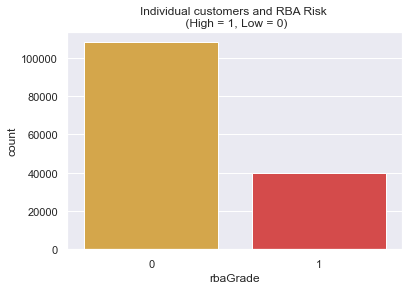

In [100]:
#Target variable imbalance for INDIVIDUAL
sns.set_theme(style="darkgrid")

ax = sns.countplot(im['rbaGrade'],palette=['#ebae34','#eb3434']);
ax.set_title('Individual customers and RBA Risk \n (High = 1, Low = 0)');
            

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


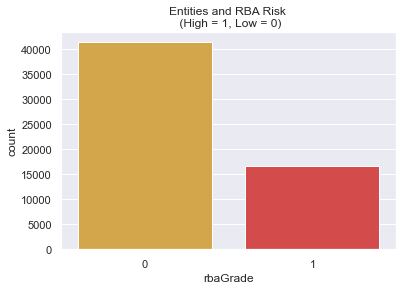

In [101]:
#Target variable imbalance for Entity
ax2 = sns.countplot(em['rbaGrade'],palette=['#ebae34','#eb3434']);
ax2.set_title('Entities and RBA Risk \n (High = 1, Low = 0)');

     

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


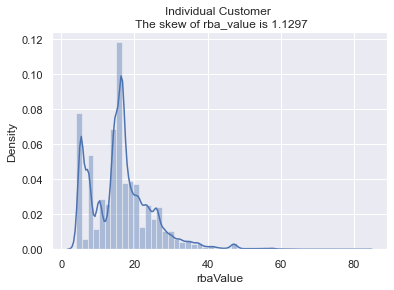

In [102]:
# plot the distribution for individual [rba_value]

sns.distplot(im['rbaValue'])
plt.title("Individual Customer \n The skew of rba_value is {:.4f}".format(im['rbaValue'].skew()));

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


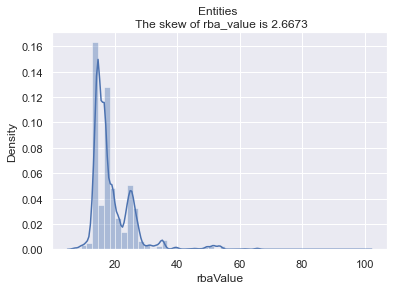

In [103]:
# plot the distribution for individual [rba_value]

sns.distplot(em['rbaValue'])
plt.title("Entities \n The skew of rba_value is {:.4f}".format(em['rbaValue'].skew()));

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


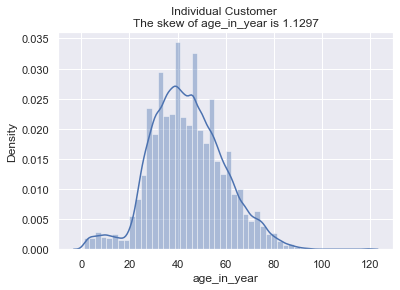

In [104]:
# plot the distribution for [age]
sns.distplot(im['age_in_year'])
plt.title("Individual Customer \nThe skew of age_in_year is {:.4f}".format(im['rbaValue'].skew()));

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


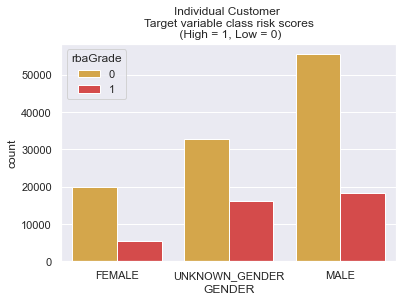

In [105]:
#[Gender] vs [rbaGrade]
ax1 = sns.countplot(im['GENDER'], hue=im['rbaGrade'],palette=['#ebae34','#eb3434']);
ax1.set_title('Individual Customer \nTarget variable class risk scores\n (High = 1, Low = 0)');

C:\Users\Javier\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


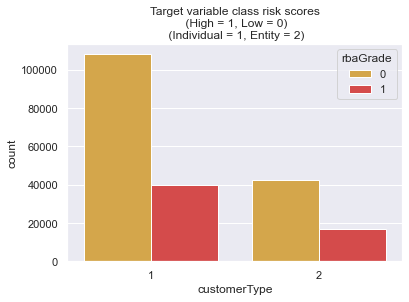

In [106]:
#[Customer type] vs [rbaGrade]
ax1 = sns.countplot(df['customerType'], hue=df['rbaGrade'],palette=['#ebae34','#eb3434']);
ax1.set_title('Target variable class risk scores\n (High = 1, Low = 0)\n (Individual = 1, Entity = 2)');

#### 3.3.2  Visualize the correlation matrix


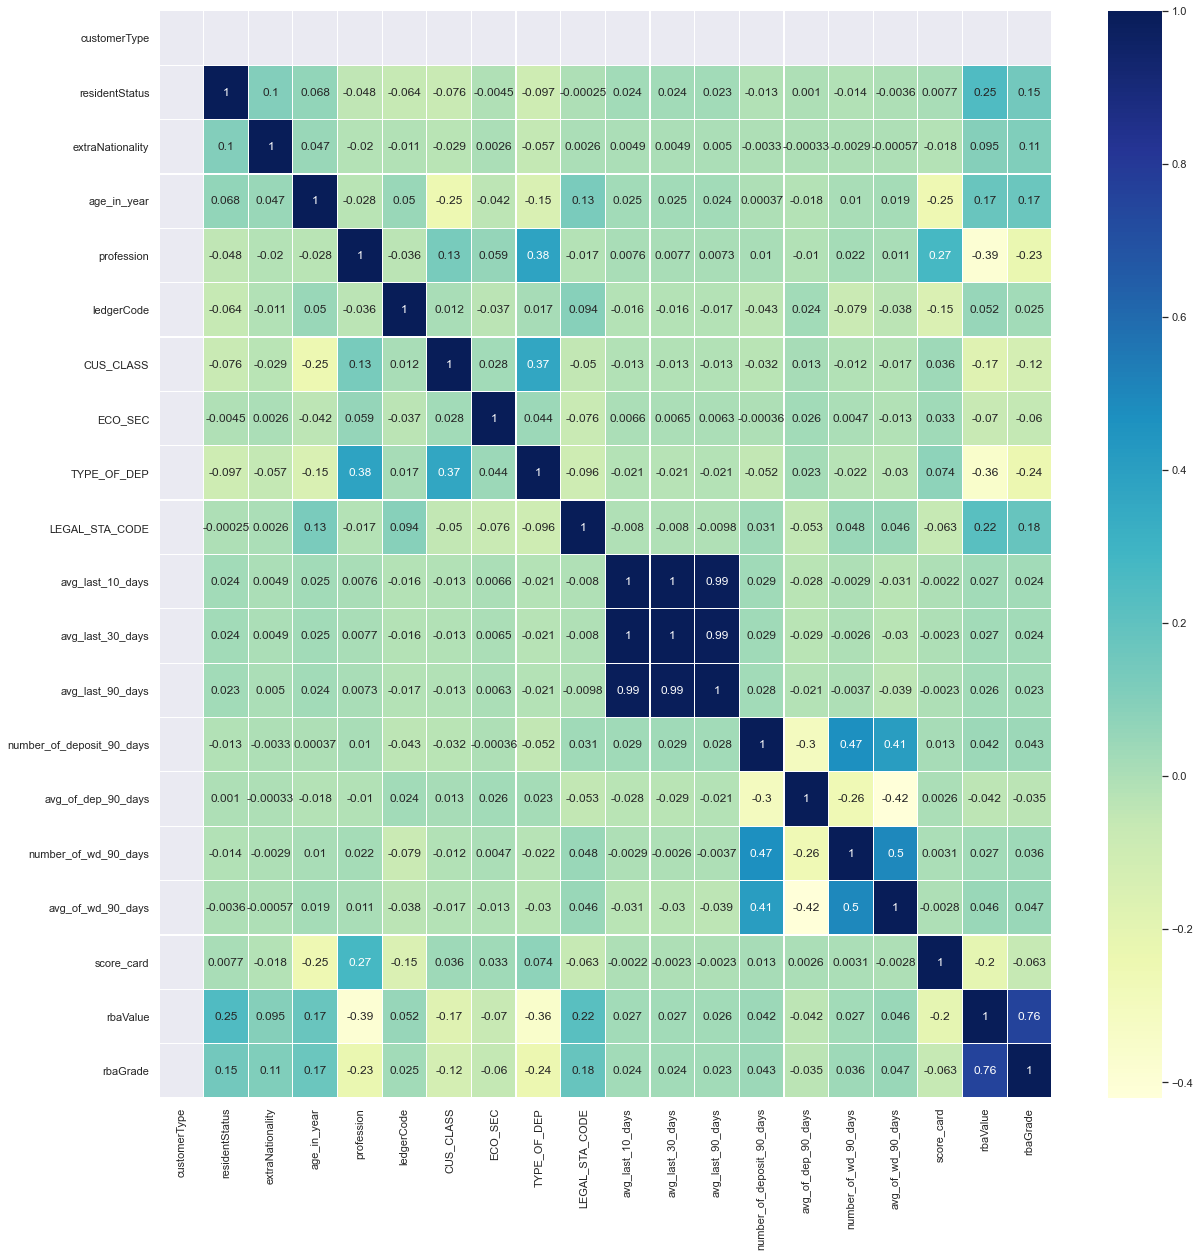

In [107]:
corr = im.corr()
plt.figure(figsize=(20,20))
sns.heatmap(im.corr(), linewidth=0.2, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True,  cmap="YlGnBu");

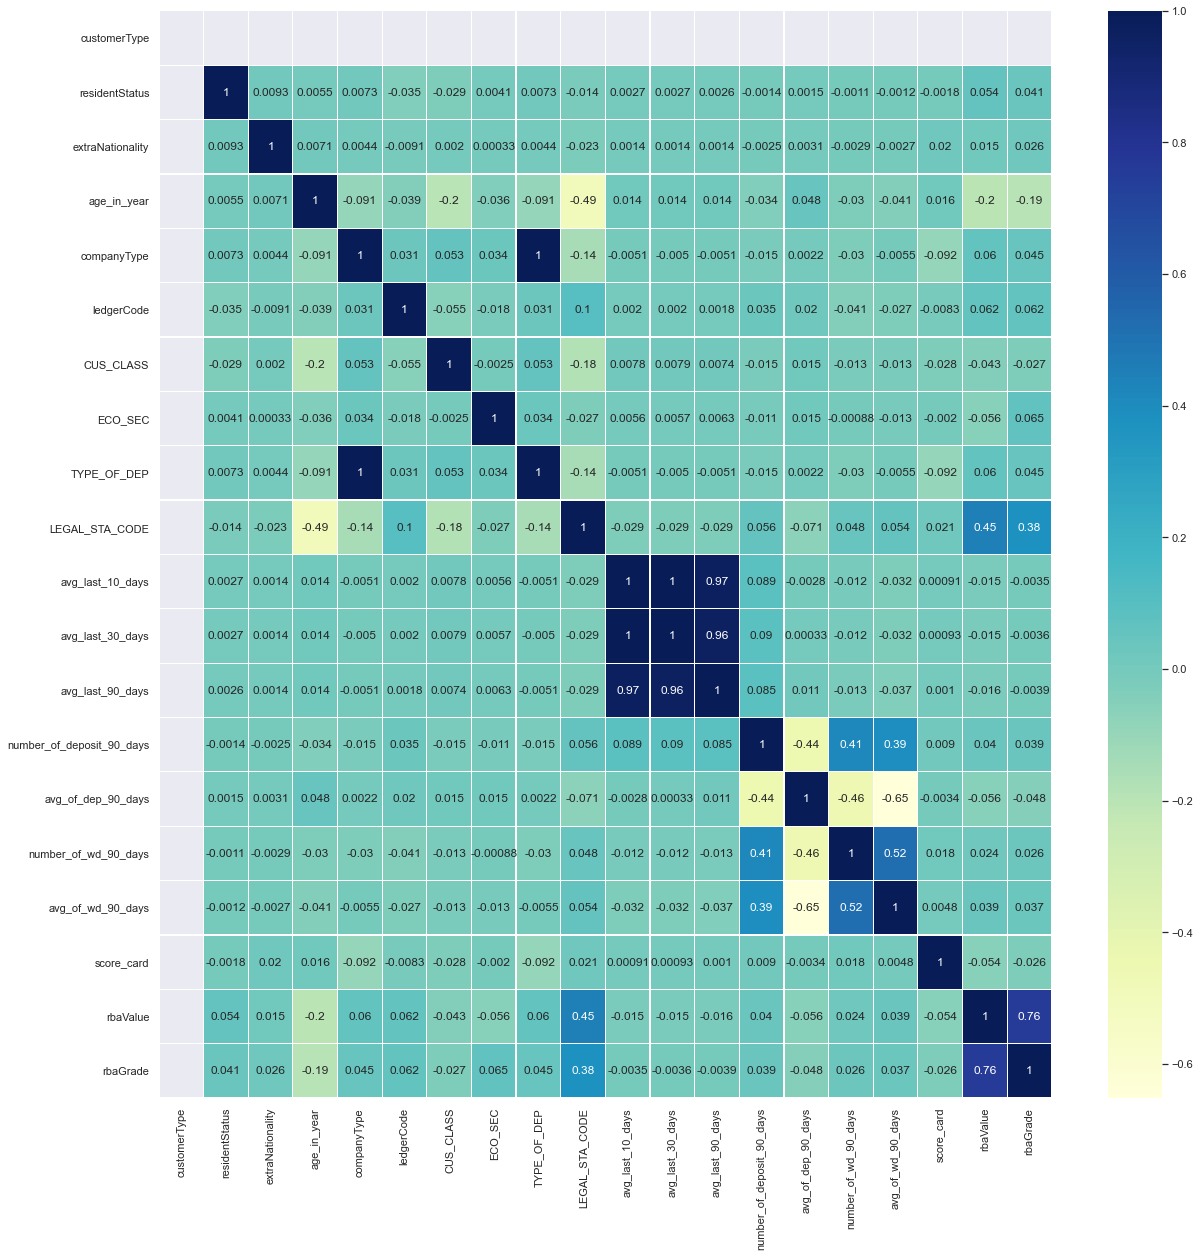

In [108]:
corr = em.corr()
plt.figure(figsize=(20,20))
sns.heatmap(em.corr(), linewidth=0.2, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
           annot = True,  cmap="YlGnBu");

***

<img src="h4.png" width=1000 height=100 align="center">

In Section 4, we develop Regression and Binary Classification models for individual and entity dataframes.
                      

## 4.1 Data preparation for Modeling

In [109]:
im_sel.dtypes.value_counts()

object            11
float64            6
int8               4
int16              2
int32              1
datetime64[ns]     1
int64              1
dtype: int64

In [110]:
em_sel.dtypes.value_counts()

object            9
float64           7
int8              4
int16             2
int32             1
datetime64[ns]    1
int64             1
dtype: int64

#### 4.1.1 datetime to days (today)

In [111]:
im_sel.select_dtypes(include=['datetime']).dtypes

creationDate    datetime64[ns]
dtype: object

In [112]:
em_sel.select_dtypes(include=['datetime']).dtypes

creationDate    datetime64[ns]
dtype: object

In [113]:
from datetime import datetime,time
#For individual dataframe im
im_sel['creationDate_indays'] = datetime.today()-im_sel['creationDate'].astype('datetime64[ns]')
im_sel['creationDate_indays']=im_sel['creationDate_indays'].dt.days
im_sel=im_sel.drop(columns=["creationDate"])

#For entity dataframe em
em_sel['creationDate_indays'] = datetime.today()-em_sel['creationDate'].astype('datetime64[ns]')
em_sel['creationDate_indays']=em_sel['creationDate_indays'].dt.days
em_sel=em_sel.drop(columns=["creationDate"])

<ipython-input-113-0bbecfc6e8ae>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im_sel['creationDate_indays'] = datetime.today()-im_sel['creationDate'].astype('datetime64[ns]')
<ipython-input-113-0bbecfc6e8ae>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  im_sel['creationDate_indays']=im_sel['creationDate_indays'].dt.days
<ipython-input-113-0bbecfc6e8ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

#### 4.1.2 Treat object types

In [114]:
im_sel.select_dtypes(include=['object']).dtypes

branchCode         object
onboarding         object
GENDER             object
Prof_Risk          object
Ledg_Risk          object
ECOSEC_Risk        object
TYPDEP_Risk        object
LEGST_Risk         object
ResCountry_Risk    object
NationOrig_Risk    object
Currency_Risk      object
dtype: object

In [115]:
em_sel.select_dtypes(include=['object']).dtypes

branchCode         object
onboarding         object
Ledg_Risk          object
ECOSEC_Risk        object
TYPDEP_Risk        object
LEGST_Risk         object
ResCountry_Risk    object
NationOrig_Risk    object
Currency_Risk      object
dtype: object

#### 4.1.3 Create dummy variables for categorical ones

In [116]:
im_sel = pd.concat([im_sel, pd.get_dummies(im_sel['GENDER'])], axis=1)
im_sel = pd.concat([im_sel, pd.get_dummies(im_sel['Prof_Risk'])], axis=1)
im_sel = pd.concat([im_sel, pd.get_dummies(im_sel['Ledg_Risk'])], axis=1)
im_sel = pd.concat([im_sel, pd.get_dummies(im_sel['ECOSEC_Risk'])], axis=1)
im_sel = pd.concat([im_sel, pd.get_dummies(im_sel['TYPDEP_Risk'])], axis=1)
im_sel = pd.concat([im_sel, pd.get_dummies(im_sel['LEGST_Risk'])], axis=1)
im_sel = pd.concat([im_sel, pd.get_dummies(im_sel['ResCountry_Risk'])], axis=1)
im_sel = pd.concat([im_sel, pd.get_dummies(im_sel['Currency_Risk'])], axis=1)
im_sel = pd.concat([im_sel, pd.get_dummies(im_sel['onboarding'])], axis=1)
im_sel


,branchCode,onboarding,residentStatus,extraNationality,age_in_year,CUS_CLASS,GENDER,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,Prof_Risk,Ledg_Risk,ECOSEC_Risk,TYPDEP_Risk,LEGST_Risk,ResCountry_Risk,NationOrig_Risk,Currency_Risk,rbaValue,rbaGrade,creationDate_indays,FEMALE,MALE,UNKNOWN_GENDER,RBA_PROF_High,RBA_PROF_Low,RBA_PROF_Med,UNKNOWN_PROFRISK,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,UNKNOWN_LEDGRISK,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_TDEP_High,RBA_TDEP_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_L_Legal_Entity,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med,N,Y
0,202,N,1,0,30,2,FEMALE,0.00,0.00,0.00,0,0.0,0,0.0,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,16.93,0,2789,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
1,202,N,1,0,30,2,FEMALE,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,16.93,0,2789,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
2,202,N,1,0,30,2,FEMALE,2079.79,526.87,6.68,4,-550.0,1,50.0,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,16.93,0,2789,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
3,202,N,1,0,30,2,FEMALE,444.00,120.50,0.95,4,-540.0,1,56.0,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,16.93,0,2789,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
4,202,N,1,0,30,2,FEMALE,0.00,0.00,0.00,0,0.0,0,0.0,0,RBA_PROF_High,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,16.93,0,2789,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147702,701,N,1,0,24,15,UNKNOWN_GENDER,13760.54,3489.72,39.75,3,-500.0,0,0.0,0,UNKNOWN_PROFRISK,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,19.73,0,1898,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
147703,208,N,1,0,49,2,MALE,-171193.36,-43177.59,-462.20,0,0.0,0,0.0,1,RBA_PROF_Low,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,10.50,0,1109,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
147704,502,N,1,0,32,15,FEMALE,73.00,22.80,0.10,0,0.0,0,0.0,0,UNKNOWN_PROFRISK,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,26.13,1,2262,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0
147705,404,N,1,0,66,2,MALE,82249.30,20728.80,222.94,0,0.0,0,0.0,0,UNKNOWN_PROFRISK,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,16.53,0,1293,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0,1,0


In [117]:
em_sel = pd.concat([em_sel, pd.get_dummies(em_sel['Ledg_Risk'])], axis=1)
em_sel = pd.concat([em_sel, pd.get_dummies(em_sel['ECOSEC_Risk'])], axis=1)
em_sel = pd.concat([em_sel, pd.get_dummies(em_sel['TYPDEP_Risk'])], axis=1)
em_sel = pd.concat([em_sel, pd.get_dummies(em_sel['LEGST_Risk'])], axis=1)
em_sel = pd.concat([em_sel, pd.get_dummies(em_sel['ResCountry_Risk'])], axis=1)
em_sel = pd.concat([em_sel, pd.get_dummies(em_sel['Currency_Risk'])], axis=1)
em_sel = pd.concat([em_sel, pd.get_dummies(em_sel['onboarding'])], axis=1)
em_sel

,branchCode,onboarding,residentStatus,extraNationality,age_in_year,companyType,CUS_CLASS,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,Ledg_Risk,ECOSEC_Risk,TYPDEP_Risk,LEGST_Risk,ResCountry_Risk,NationOrig_Risk,Currency_Risk,rbaGrade,rbaValue,creationDate_indays,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,UNKNOWN_LEDGRISK,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_TDEP_High,RBA_TDEP_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_L_Legal_Entity,RBA_M_Legal_Entity,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med,N,Y
0,202,N,1,0,39,51.0,2,2719.42,624.01,5.18,0,0.0,0,0.0,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,0,14.53,1810,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
1,201,N,1,0,5,49.0,0,0.00,0.00,0.00,0,0.0,0,0.0,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med,0,13.20,2635,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0
2,201,N,1,0,5,49.0,0,-9020000.00,-2273333.33,-24444.44,0,0.0,0,0.0,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med,0,13.20,2635,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0
3,201,N,1,0,5,49.0,0,0.00,0.00,0.00,0,0.0,0,0.0,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med,0,13.20,2635,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0
4,201,N,1,0,5,49.0,0,0.00,0.00,0.00,0,0.0,0,0.0,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med,0,13.20,2635,0,1,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58317,302,N,1,0,53,51.0,2,0.00,0.00,0.00,0,0.0,0,0.0,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Med,0,16.53,2612,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,1,0
58318,209,N,1,0,29,51.0,15,202.07,50.93,0.55,0,0.0,0,0.0,0,UNKNOWN_LEDGRISK,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,0,16.53,2496,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
58319,702,N,1,0,22,51.0,2,0.00,0.00,0.00,0,0.0,0,0.0,0,RBA_Ledger_Low,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,0,18.48,1807,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0
58320,502,N,1,0,41,51.0,2,6597.29,1662.73,17.88,0,0.0,0,0.0,0,UNKNOWN_LEDGRISK,RBA_ECO_SEC_Low,RBA_TDEP_Low,RBA_L_Legal_Entity,RBA_Countries_Low,RBA_Countries_Low,RBA_Currency_Low,0,14.53,7562,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0


#### 4.1.4 Variable selection for modelling

In [118]:
X_im = im_sel[['residentStatus'
,'extraNationality'
,'age_in_year'
,'avg_last_10_days'
,'avg_last_30_days'
,'avg_last_90_days'
,'number_of_deposit_90_days'
,'avg_of_dep_90_days'
,'number_of_wd_90_days'
,'avg_of_wd_90_days'
,'score_card'
,'FEMALE'
,'MALE'
,'UNKNOWN_GENDER'
,'RBA_PROF_High'
,'RBA_PROF_Low'
,'RBA_PROF_Med'
,'UNKNOWN_PROFRISK'
,'RBA_Ledger_High'
,'RBA_Ledger_Low'
,'RBA_ledger_Med'
,'UNKNOWN_LEDGRISK'
,'RBA_ECO_SEC_High'
,'RBA_ECO_SEC_Low'
,'RBA_ECO_SEC_Med'
,'RBA_TDEP_High'
,'RBA_TDEP_Low'
,'RBA_TDEP_Medium'
,'RBA_H_legal_Entity'
,'RBA_L_Legal_Entity'
,'RBA_Countries_High'
,'RBA_Countries_Low'
,'RBA_Countries_Medium'
,'RBA_Currency_High'
,'RBA_Currency_Low'
,'RBA_Currency_Med']]
X_im

,residentStatus,extraNationality,age_in_year,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,FEMALE,MALE,UNKNOWN_GENDER,RBA_PROF_High,RBA_PROF_Low,RBA_PROF_Med,UNKNOWN_PROFRISK,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,UNKNOWN_LEDGRISK,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_TDEP_High,RBA_TDEP_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_L_Legal_Entity,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med
0,1,0,30,0.00,0.00,0.00,0,0.0,0,0.0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
1,1,0,30,-137562.72,-34672.52,-369.81,0,0.0,0,0.0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
2,1,0,30,2079.79,526.87,6.68,4,-550.0,1,50.0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
3,1,0,30,444.00,120.50,0.95,4,-540.0,1,56.0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
4,1,0,30,0.00,0.00,0.00,0,0.0,0,0.0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147702,1,0,24,13760.54,3489.72,39.75,3,-500.0,0,0.0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
147703,1,0,49,-171193.36,-43177.59,-462.20,0,0.0,0,0.0,1,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
147704,1,0,32,73.00,22.80,0.10,0,0.0,0,0.0,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
147705,1,0,66,82249.30,20728.80,222.94,0,0.0,0,0.0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0


In [119]:
Y_im_REG = im_sel['rbaValue']
Y_im_REG

0         16.93
1         16.93
2         16.93
3         16.93
4         16.93
          ...  
147702    19.73
147703    10.50
147704    26.13
147705    16.53
147706    24.53
Name: rbaValue, Length: 147705, dtype: float64

In [120]:
Y_im_CLASS = im_sel['rbaGrade']
Y_im_CLASS

0         0
1         0
2         0
3         0
4         0
         ..
147702    0
147703    0
147704    1
147705    0
147706    1
Name: rbaGrade, Length: 147705, dtype: int64

In [121]:
X_em = em_sel[['residentStatus'
,'extraNationality'
,'age_in_year'
,'avg_last_10_days'
,'avg_last_30_days'
,'avg_last_90_days'
,'number_of_deposit_90_days'
,'avg_of_dep_90_days'
,'number_of_wd_90_days'
,'avg_of_wd_90_days'
,'score_card'
,'RBA_Ledger_High'
,'RBA_Ledger_Low'
,'RBA_ledger_Med'
,'UNKNOWN_LEDGRISK'
,'RBA_ECO_SEC_High'
,'RBA_ECO_SEC_Low'
,'RBA_ECO_SEC_Med'
,'RBA_TDEP_High'
,'RBA_TDEP_Low'
,'RBA_TDEP_Medium'
,'RBA_H_legal_Entity'
,'RBA_L_Legal_Entity'
,'RBA_Countries_High'
,'RBA_Countries_Low'
,'RBA_Countries_Medium'
,'RBA_Currency_High'
,'RBA_Currency_Low'
,'RBA_Currency_Med']]
X_em

,residentStatus,extraNationality,age_in_year,avg_last_10_days,avg_last_30_days,avg_last_90_days,number_of_deposit_90_days,avg_of_dep_90_days,number_of_wd_90_days,avg_of_wd_90_days,score_card,RBA_Ledger_High,RBA_Ledger_Low,RBA_ledger_Med,UNKNOWN_LEDGRISK,RBA_ECO_SEC_High,RBA_ECO_SEC_Low,RBA_ECO_SEC_Med,RBA_TDEP_High,RBA_TDEP_Low,RBA_TDEP_Medium,RBA_H_legal_Entity,RBA_L_Legal_Entity,RBA_Countries_High,RBA_Countries_Low,RBA_Countries_Medium,RBA_Currency_High,RBA_Currency_Low,RBA_Currency_Med
0,1,0,39,2719.42,624.01,5.18,0,0.0,0,0.0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
1,1,0,5,0.00,0.00,0.00,0,0.0,0,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
2,1,0,5,-9020000.00,-2273333.33,-24444.44,0,0.0,0,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
3,1,0,5,0.00,0.00,0.00,0,0.0,0,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
4,1,0,5,0.00,0.00,0.00,0,0.0,0,0.0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58317,1,0,53,0.00,0.00,0.00,0,0.0,0,0.0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1
58318,1,0,29,202.07,50.93,0.55,0,0.0,0,0.0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0
58319,1,0,22,0.00,0.00,0.00,0,0.0,0,0.0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,1,0
58320,1,0,41,6597.29,1662.73,17.88,0,0.0,0,0.0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,1,0


In [122]:
Y_em_REG = em_sel['rbaValue']
Y_em_REG

0        14.53
1        13.20
2        13.20
3        13.20
4        13.20
         ...  
58317    16.53
58318    16.53
58319    18.48
58320    14.53
58321    22.88
Name: rbaValue, Length: 58195, dtype: float64

In [123]:
Y_em_CLASS = em_sel['rbaGrade']
Y_em_CLASS

0        0
1        0
2        0
3        0
4        0
        ..
58317    0
58318    0
58319    0
58320    0
58321    1
Name: rbaGrade, Length: 58195, dtype: int64

___ 

## 4.2. Machine Learning: (Regression Model Development)

#### 4.2.1 Using model_selection.train_test_split from sklearn library to split the our data into training and testing sets

In [125]:
from sklearn.model_selection import train_test_split

In [126]:
X_im_train, X_im_test, y_im_train, y_im_test = train_test_split(X_im, Y_im_REG, test_size=0.33, random_state=101)

In [127]:
X_em_train, X_em_test, y_em_train, y_em_test = train_test_split(X_em, Y_em_REG, test_size=0.33, random_state=101)

#### 4.2.2 Importing RandomForestRegression() model from sklearn

In [128]:
from sklearn.ensemble import RandomForestRegressor

#### 4.2.3 Training and fitting the model on the training set. 
##### A. Individual Dataset Model

In [129]:
# Fit regression model
params = {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 2,'random_state':80}
rfr = RandomForestRegressor(**params)
rfr.fit(X_im_train, y_im_train)

RandomForestRegressor(max_depth=4, n_estimators=50, random_state=80)

In [130]:
y_im_train_preds = rfr.predict(X_im_train)
y_im_test_preds = rfr.predict(X_im_test)

In [131]:
# Let's make a spearman correlation between predicted and observed values
from scipy.stats import spearmanr 
corr, p_value = spearmanr(y_im_train, y_im_train_preds)
print("spearman rank correlation - train_im=",corr, p_value)
corr, p_value = spearmanr(y_im_test, y_im_test_preds)
print("spearman rank correlation - test_im=",corr, p_value)

spearman rank correlation - train_im= 0.670228631152991 0.0
spearman rank correlation - test_im= 0.6707717965485128 0.0


##### B. Entity Dataset Model

In [132]:
rfr.fit(X_em_train, y_em_train)

RandomForestRegressor(max_depth=4, n_estimators=50, random_state=80)

In [133]:
y_em_train_preds = rfr.predict(X_em_train)
y_em_test_preds = rfr.predict(X_em_test)

In [134]:
corr, p_value = spearmanr(y_em_train, y_em_train_preds)
print("spearman rank correlation - train_em=",corr, p_value)
corr, p_value = spearmanr(y_em_test, y_em_test_preds)
print("spearman rank correlation - test_em=",corr, p_value)

spearman rank correlation - train_em= 0.4749007790184524 0.0
spearman rank correlation - test_em= 0.4690424269959199 0.0


#### 4.2.4 Scatterplot for predictions vs actual in test set

Text(0, 0.5, 'y_im_pred')

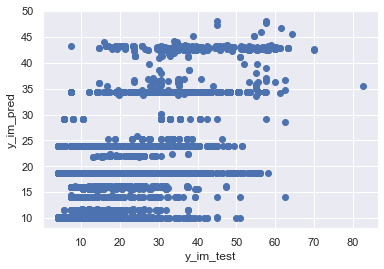

In [135]:
plt.scatter(y_im_test,y_im_test_preds)
plt.xlabel('y_im_test')
plt.ylabel('y_im_pred')

Text(0, 0.5, 'y_em_pred')

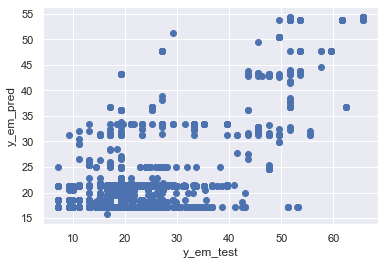

In [136]:
plt.scatter(y_em_test,y_em_test_preds)
plt.xlabel('y_em_test')
plt.ylabel('y_em_pred')

#### 4.2.5 Model evaluation
We will import metrics from sklearn, and evaluate the model accuracy by calculating:
<ul>
<li>Mean Absolute Error (MAE)
        <li>Mean Squared Error (MSE)
            <li>Root Mean Squared Error (RMSE) 

In [137]:
from sklearn import metrics

In [138]:
print('im_MAE:', metrics.mean_absolute_error(y_im_test, y_im_test_preds))
print('im_MSE:', metrics.mean_squared_error(y_im_test, y_im_test_preds))
print('im_RMSE:', np.sqrt(metrics.mean_squared_error(y_im_test, y_im_test_preds)))

im_MAE: 4.464159239365956
im_MSE: 34.928878277186136
im_RMSE: 5.910065843726797


In [139]:
print('em_MAE:', metrics.mean_absolute_error(y_em_test, y_em_test_preds))
print('em_MSE:', metrics.mean_squared_error(y_em_test, y_em_test_preds))
print('em_RMSE:', np.sqrt(metrics.mean_squared_error(y_em_test, y_em_test_preds)))

em_MAE: 3.4730069169877034
em_MSE: 21.73316972899994
em_RMSE: 4.661884782896284


## 4.3. Machine Learning: (RandomForest Classification Model Development)

#### 4.3.1 Using model_selection.train_test_split from sklearn library to split the our data into training and testing sets

In [140]:
X_im_train, X_im_test, y_im_train, y_im_test = train_test_split(X_im, Y_im_CLASS, test_size=0.33, random_state=101)

In [141]:
X_em_train, X_em_test, y_em_train, y_em_test = train_test_split(X_em, Y_em_CLASS, test_size=0.33, random_state=101)

#### 4.3.2 Importing RandomForestClassifier() model from sklearn

In [142]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': 50, 'max_depth': 4, 'min_samples_split': 3,'random_state':80}
rf = RandomForestClassifier(**params)

#### 4.3.3 Training and fitting the model on the training set. 
##### A. Individual Dataset Model

In [143]:
rf.fit(X_im_train, y_im_train)

RandomForestClassifier(max_depth=4, min_samples_split=3, n_estimators=50,
                       random_state=80)

In [144]:
y_im_train_preds = rf.predict(X_im_train)
y_im_test_preds = rf.predict(X_im_test)

In [145]:
# Let's calculate Accuracy between predicted and observed values
from sklearn.metrics import accuracy_score 
a_score = accuracy_score(y_im_train, y_im_train_preds)
print("accuracy_score - train=",a_score)
a_score = accuracy_score(y_im_test, y_im_test_preds)
print("accuracy_score - test=",a_score)

accuracy_score - train= 0.7914755158545704
accuracy_score - test= 0.7924625074369653


##### B. Entity Dataset Model

In [146]:
rf.fit(X_em_train, y_em_train)

RandomForestClassifier(max_depth=4, min_samples_split=3, n_estimators=50,
                       random_state=80)

In [147]:
y_em_train_preds = rf.predict(X_em_train)
y_em_test_preds = rf.predict(X_em_test)

In [148]:
# Let's calculate Accuracy between predicted and observed values
from sklearn.metrics import accuracy_score 
a_score = accuracy_score(y_em_train, y_em_train_preds)
print("accuracy_score - train=",a_score)
a_score = accuracy_score(y_em_test, y_em_test_preds)
print("accuracy_score - test=",a_score)

accuracy_score - train= 0.7549371633752244
accuracy_score - test= 0.7530330643061702


#### 4.3.4 Confusion matrix

In [149]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [150]:
print(confusion_matrix(y_im_test,y_im_test_preds))

[[34953   787]
 [ 9329  3674]]


In [151]:
print(confusion_matrix(y_em_test,y_em_test_preds))

[[13434   198]
 [ 4545  1028]]


#### 4.3.5 Evaluate model accuracy

In [152]:
print(classification_report(y_im_test,y_im_test_preds))

              precision    recall  f1-score   support

           0       0.79      0.98      0.87     35740
           1       0.82      0.28      0.42     13003

    accuracy                           0.79     48743
   macro avg       0.81      0.63      0.65     48743
weighted avg       0.80      0.79      0.75     48743



In [153]:
print(classification_report(y_em_test,y_em_test_preds))

              precision    recall  f1-score   support

           0       0.75      0.99      0.85     13632
           1       0.84      0.18      0.30      5573

    accuracy                           0.75     19205
   macro avg       0.79      0.58      0.58     19205
weighted avg       0.77      0.75      0.69     19205

